# Telecom Churn Assignment

Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Steps :-
1. Reading and understanding the data
2. Missing value treatment
3. filtering high value customers and creating churn column
4. Derive new features
5. Visualising the Data 
   - Univariate and Bivariate analysis
   - Outlier treatment
6. Model Building
   
   6a - Model building with PCA
	- Splitting Data into Training and Test Sets
	- PCA on the data
	- Building Random Forest model on the data on our Principal components
	- Treating class imbalace
	  - Random Forest With Class Weighting
	- Hyperparameter tuning
	- Model evaluation
	- final model
	- Prediction on test data
   
   6b. - Logistic Regression model for Feature Importance
	- Splitting Data into Training and Test Sets
	- Scaling the variables
	- Feature selection using RFE
	- creating models and removing featured based on p-value and VIF
	- creating final model 
	- Model evaluation
	- Prediction on test data
	- Recommendataions	

### Importing all the import library

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# import all the libraries for PCA and random forest model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# import libraries important for LR
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Step 1 - Reading and understanding of data

In [3]:
# Importing dataset

tel_data = pd.read_csv("telecom_churn_data.csv")

In [4]:
# Shape

tel_data.shape

(99999, 226)

In [5]:
# sample data

tel_data.sample(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
51421     7002159650        109             0.0             0.0   
3155      7000708992        109             0.0             0.0   
82225     7000349269        109             0.0             0.0   
34564     7001619920        109             0.0             0.0   
13294     7001066526        109             0.0             0.0   
96492     7001392974        109             0.0             0.0   
58472     7000135313        109             0.0             0.0   
37081     7001500781        109             0.0             0.0   
50383     7000892012        109             0.0             0.0   
7895      7000488628        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
51421             0.0            6/30/2014            7/31/2014   
3155              0.0            6/30/2014            7/31/2014   
82225             0.0            6/30/2014            7/31/2014   
34564             0.0            6/30/2014            7/31/2014   
13294             0.0            6/30/2014            7/31/2014   
96492             0.0            6/30/2014            7/31/2014   
58472             0.0            6/30/2014            7/31/2014   
37081             0.0            6/30/2014            7/31/2014   
50383             0.0            6/30/2014            7/31/2014   
7895              0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7   arpu_8  \
51421            8/31/2014            9/30/2014   372.349   240.859  200.708   
3155             8/31/2014            9/30/2014   624.580     0.680  368.294   
82225            8/31/2014            9/30/2014   554.880   737.586  591.635   
34564            8/31/2014            9/30/2014   424.206   356.940  431.090   
13294            8/31/2014            9/30/2014   118.861    63.121  145.096   
96492            8/31/2014            9/30/2014   541.756   445.683  460.615   
58472                  NaN                  NaN   954.202   456.152    0.000   
37081            8/31/2014            9/30/2014   187.013    26.431  228.500   
50383            8/31/2014            9/30/2014   196.817    20.869   47.000   
7895             8/31/2014            9/30/2014  1441.595  1410.141  725.599   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
51421  469.781       137.23       123.61         4.00         0.21   
3155     0.000         7.76         0.00         0.00          NaN   
82225  445.991        50.64        44.59        82.09        52.74   
34564  393.609       264.23       259.34       241.99       197.28   
13294   78.996         7.81         6.33         3.94         1.46   
96492  362.620       483.04       241.38       341.78       261.46   
58472    0.000       328.93       157.76          NaN          NaN   
37081  138.037         5.54         7.56         6.38         7.08   
50383   38.600        65.36        15.78         4.78         0.00   
7895    22.234      2072.96      1531.88       525.99          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
51421        195.33         76.48          6.46          0.00           0.00   
3155          21.41          1.15          0.00           NaN           0.00   
82225        267.93        387.63        390.63        258.88           0.00   
34564        436.33        350.03        560.68        676.19           0.00   
13294        139.69         70.26        158.58        107.93           0.00   
96492        415.44        520.83        368.86        284.61           0.00   
58472        712.51        323.43           NaN           NaN           0.00   
37081        118.59        116.13        121.86        138.71           0.00   
50383        117.79         73.04         28.26         17.23          44.71   
7895         550.64       1104.36        394.68           NaN           0.00   

In [6]:
# columns in the dataset

tel_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

## Step 2 - Missing value treatment

In [7]:
# calculate the missing count and percentage and create a dataframe (miss_df)

miss_count = tel_data.isnull().sum()
miss_percentage = round(miss_count/len(tel_data.index)*100,2)

miss_df = pd.DataFrame({'count': miss_count, 'percentage':miss_percentage})
miss_df.sort_values(ascending=False, by = 'percentage')

count  percentage
arpu_3g_6                 74846       74.85
night_pck_user_6          74846       74.85
total_rech_data_6         74846       74.85
arpu_2g_6                 74846       74.85
max_rech_data_6           74846       74.85
fb_user_6                 74846       74.85
av_rech_amt_data_6        74846       74.85
date_of_last_rech_data_6  74846       74.85
count_rech_2g_6           74846       74.85
count_rech_3g_6           74846       74.85
date_of_last_rech_data_7  74428       74.43
total_rech_data_7         74428       74.43
fb_user_7                 74428       74.43
max_rech_data_7           74428       74.43
night_pck_user_7          74428       74.43
count_rech_2g_7           74428       74.43
av_rech_amt_data_7        74428       74.43
arpu_2g_7                 74428       74.43
count_rech_3g_7           74428       74.43
arpu_3g_7                 74428       74.43
total_rech_data_9         74077       74.08
count_rech_3g_9           74077       74.08
fb_user_9                 74077       74.08
max_rech_data_9           74077       74.08
arpu_3g_9                 74077       74.08
date_of_last_rech_data_9  74077       74.08
night_pck_user_9          74077       74.08
arpu_2g_9                 74077       74.08
count_rech_2g_9           74077       74.08
av_rech_amt_data_9        74077       74.08
total_rech_data_8         73660       73.66
arpu_3g_8                 73660       73.66
fb_user_8                 73660       73.66
night_pck_user_8          73660       73.66
av_rech_amt_data_8        73660       73.66
max_rech_data_8           73660       73.66
count_rech_3g_8           73660       73.66
arpu_2g_8                 73660       73.66
count_rech_2g_8           73660       73.66
date_of_last_rech_data_8  73660       73.66
ic_others_9                7745        7.75
std_og_mou_9               7745        7.75
std_og_t2c_mou_9           7745        7.75
isd_ic_mou_9               7745        7.75
std_ic_mou_9               7745        7.75
isd_og_mou_9               7745        7.75
spl_og_mou_9               7745        7.75
spl_ic_mou_9               7745        7.75
og_others_9                7745        7.75
loc_ic_t2t_mou_9           7745        7.75
std_ic_t2o_mou_9           7745        7.75
loc_ic_t2m_mou_9           7745        7.75
std_ic_t2f_mou_9           7745        7.75
loc_ic_t2f_mou_9           7745        7.75
loc_ic_mou_9               7745        7.75
std_ic_t2m_mou_9           7745        7.75
std_og_t2f_mou_9           7745        7.75
std_og_t2t_mou_9           7745        7.75
std_ic_t2t_mou_9           7745        7.75
loc_og_mou_9               7745        7.75
roam_og_mou_9              7745        7.75
loc_og_t2m_mou_9           7745        7.75
loc_og_t2f_mou_9           7745        7.75
roam_ic_mou_9              7745        7.75
offnet_mou_9               7745        7.75
loc_og_t2c_mou_9           7745        7.75
loc_og_t2t_mou_9           7745        7.75
std_og_t2m_mou_9           7745        7.75
onnet_mou_9                7745        7.75
onnet_mou_8                5378        5.38
std_ic_t2t_mou_8           5378        5.38
std_ic_mou_8               5378        5.38
loc_ic_t2t_mou_8           5378        5.38
roam_og_mou_8              5378        5.38
std_ic_t2m_mou_8           5378        5.38
loc_ic_mou_8               5378        5.38
std_ic_t2f_mou_8           5378        5.38
roam_ic_mou_8              5378        5.38
std_ic_t2o_mou_8           5378        5.38
loc_og_t2t_mou_8           5378        5.38
loc_ic_t2f_mou_8           5378        5.38
offnet_mou_8               5378        5.38
loc_ic_t2m_mou_8           5378        5.38
loc_og_t2m_mou_8           5378        5.38
isd_og_mou_8               5378        5.38
ic_others_8                5378        5.38
og_others_8                5378        5.38
spl_ic_mou_8               5378        5.38
loc_og_t2f_mou_8           5378        5.38
std_og_t2m_mou_8           5378        5.38
spl_og_mou_8          

### Comment

- Even though the 'av_rech_amt_data_6', 'total_rech_data_6', 'av_rech_amt_data_7', 'total_rech_data_7', 'av_rech_amt_data_8', and 'total_rech_data_8' columns has more than 70% null values, as this columns are important for filtering the high value customers, we are imputing the null values with zeros in these 6 columns

In [8]:
# Important columns for filtering the high value customers

data_columns = ['av_rech_amt_data_6', 'total_rech_data_6', 'av_rech_amt_data_7', 'total_rech_data_7',
                'av_rech_amt_data_8', 'total_rech_data_8']

In [9]:
# Function to fill the numeric column's null value with the 0

def fill_na_with_zero(column_names):
    for column in column_names:
        tel_data[column].fillna(0, inplace=True)

In [10]:
# Filling the null values in the data related columns with 0

fill_na_with_zero(data_columns)

In [11]:
# calculate the missing count and percentage and create a dataframe (miss_df)

miss_count = tel_data.isnull().sum()
miss_percentage = round(miss_count/len(tel_data.index)*100,2)

miss_df = pd.DataFrame({'count': miss_count, 'percentage':miss_percentage})
miss_df.sort_values(ascending=False, by = 'percentage')

count  percentage
max_rech_data_6           74846       74.85
fb_user_6                 74846       74.85
arpu_3g_6                 74846       74.85
night_pck_user_6          74846       74.85
arpu_2g_6                 74846       74.85
date_of_last_rech_data_6  74846       74.85
count_rech_2g_6           74846       74.85
count_rech_3g_6           74846       74.85
arpu_2g_7                 74428       74.43
fb_user_7                 74428       74.43
count_rech_2g_7           74428       74.43
date_of_last_rech_data_7  74428       74.43
max_rech_data_7           74428       74.43
count_rech_3g_7           74428       74.43
arpu_3g_7                 74428       74.43
night_pck_user_7          74428       74.43
date_of_last_rech_data_9  74077       74.08
arpu_2g_9                 74077       74.08
total_rech_data_9         74077       74.08
arpu_3g_9                 74077       74.08
night_pck_user_9          74077       74.08
fb_user_9                 74077       74.08
max_rech_data_9           74077       74.08
count_rech_2g_9           74077       74.08
av_rech_amt_data_9        74077       74.08
count_rech_3g_9           74077       74.08
fb_user_8                 73660       73.66
arpu_2g_8                 73660       73.66
max_rech_data_8           73660       73.66
arpu_3g_8                 73660       73.66
count_rech_2g_8           73660       73.66
date_of_last_rech_data_8  73660       73.66
count_rech_3g_8           73660       73.66
night_pck_user_8          73660       73.66
std_og_t2m_mou_9           7745        7.75
std_og_t2f_mou_9           7745        7.75
isd_ic_mou_9               7745        7.75
std_og_t2c_mou_9           7745        7.75
spl_ic_mou_9               7745        7.75
ic_others_9                7745        7.75
loc_ic_t2t_mou_9           7745        7.75
std_og_mou_9               7745        7.75
isd_og_mou_9               7745        7.75
std_ic_t2m_mou_9           7745        7.75
spl_og_mou_9               7745        7.75
std_ic_t2o_mou_9           7745        7.75
og_others_9                7745        7.75
loc_ic_t2f_mou_9           7745        7.75
std_ic_t2t_mou_9           7745        7.75
std_og_t2t_mou_9           7745        7.75
std_ic_t2f_mou_9           7745        7.75
std_ic_mou_9               7745        7.75
loc_ic_t2m_mou_9           7745        7.75
loc_ic_mou_9               7745        7.75
loc_og_t2f_mou_9           7745        7.75
loc_og_t2m_mou_9           7745        7.75
onnet_mou_9                7745        7.75
roam_og_mou_9              7745        7.75
loc_og_mou_9               7745        7.75
roam_ic_mou_9              7745        7.75
offnet_mou_9               7745        7.75
loc_og_t2c_mou_9           7745        7.75
loc_og_t2t_mou_9           7745        7.75
og_others_8                5378        5.38
loc_og_t2t_mou_8           5378        5.38
roam_og_mou_8              5378        5.38
std_ic_t2o_mou_8           5378        5.38
std_og_t2t_mou_8           5378        5.38
roam_ic_mou_8              5378        5.38
std_ic_t2f_mou_8           5378        5.38
offnet_mou_8               5378        5.38
loc_ic_t2m_mou_8           5378        5.38
std_ic_t2m_mou_8           5378        5.38
loc_ic_t2f_mou_8           5378        5.38
onnet_mou_8                5378        5.38
std_ic_t2t_mou_8           5378        5.38
loc_ic_t2t_mou_8           5378        5.38
loc_og_t2m_mou_8           5378        5.38
loc_ic_mou_8               5378        5.38
ic_others_8                5378        5.38
std_ic_mou_8               5378        5.38
loc_og_t2f_mou_8           5378        5.38
isd_og_mou_8               5378        5.38
spl_ic_mou_8               5378        5.38
std_og_mou_8               5378        5.38
loc_og_t2c_mou_8           5378        5.38
std_og_t2m_mou_8           5378        5.38
std_og_t2c_mou_8           5378        5.38
spl_og_mou_8               5378        5.38
isd_ic_mou_8               5378        5.38
loc_og_mou_8          

In [12]:
# select and create df having column with missing value greater than 70%

miss_df1 = miss_df[miss_df.percentage > 70]
miss_df1

count  percentage
date_of_last_rech_data_6  74846       74.85
date_of_last_rech_data_7  74428       74.43
date_of_last_rech_data_8  73660       73.66
date_of_last_rech_data_9  74077       74.08
total_rech_data_9         74077       74.08
max_rech_data_6           74846       74.85
max_rech_data_7           74428       74.43
max_rech_data_8           73660       73.66
max_rech_data_9           74077       74.08
count_rech_2g_6           74846       74.85
count_rech_2g_7           74428       74.43
count_rech_2g_8           73660       73.66
count_rech_2g_9           74077       74.08
count_rech_3g_6           74846       74.85
count_rech_3g_7           74428       74.43
count_rech_3g_8           73660       73.66
count_rech_3g_9           74077       74.08
av_rech_amt_data_9        74077       74.08
arpu_3g_6                 74846       74.85
arpu_3g_7                 74428       74.43
arpu_3g_8                 73660       73.66
arpu_3g_9                 74077       74.08
arpu_2g_6                 74846       74.85
arpu_2g_7                 74428       74.43
arpu_2g_8                 73660       73.66
arpu_2g_9                 74077       74.08
night_pck_user_6          74846       74.85
night_pck_user_7          74428       74.43
night_pck_user_8          73660       73.66
night_pck_user_9          74077       74.08
fb_user_6                 74846       74.85
fb_user_7                 74428       74.43
fb_user_8                 73660       73.66
fb_user_9                 74077       74.08

In [13]:
# create variables having columns name from above df (having more than 70% missing data)

col_var = miss_df1.index
col_var

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [14]:
# delete these columns from original dataset

tel_data = tel_data.drop(col_var,axis=1)
tel_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [15]:
tel_data.shape

(99999, 192)

In [16]:
# calculate the missing count and percentage and create a dataframe (miss_df) again

miss_count = tel_data.isnull().sum()
miss_percentage = round(miss_count/len(tel_data.index)*100,2) 

#list of columns having null percentage greater than 0
null_list = list(miss_percentage[miss_percentage>0].index)

# convert the list to set
null_set = set(null_list)

In [17]:
# import library to check datatype

from pandas.api.types import is_string_dtype, is_numeric_dtype

In [18]:
# find out the list of numeric and categorical columns from tel_data dataset

num_list = []
cat_list = []

# for all columns in hsg df find numeric and categorical column
for column in tel_data:
    if is_numeric_dtype(tel_data[column]):
        num_list.append(column)
    elif is_string_dtype(tel_data[column]):
        cat_list.append(column)

num_set = set(num_list)
cat_set = set(cat_list)

In [19]:
# create list of columns having null and separate them in categorical and continious variable list

null_cat_list = list(null_set.intersection(cat_set))
null_num_list = list(null_set.intersection(num_set))

print("Null numeric columns are: ",null_num_list)
print("Null categorical columns are: ",null_cat_list)

Null numeric columns are:  ['spl_ic_mou_9', 'loc_og_mou_8', 'og_others_7', 'std_ic_t2f_mou_7', 'std_og_t2t_mou_9', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'loc_ic_t2f_mou_9', 'loc_og_t2f_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2c_mou_9', 'loc_ic_t2t_mou_8', 'loc_ic_mou_9', 'loc_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'roam_og_mou_8', 'std_og_t2f_mou_9', 'loc_og_t2c_mou_7', 'onnet_mou_8', 'ic_others_9', 'std_og_mou_9', 'spl_og_mou_7', 'std_og_mou_7', 'loc_og_mou_6', 'ic_others_7', 'isd_og_mou_6', 'ic_others_8', 'isd_ic_mou_9', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_ic_t2t_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_7', 'loc_ic_mou_7', 'loc_og_t2o_mou', 'std_og_t2f_mou_6', 'isd_og_mou_8', 'loc_ic_t2o_mou', 'loc_ic_t2t_mou_7', 'loc_og_t2t_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2f_mou_9', 'std_og_t2m_mou_8', 'onnet_mou_6', 'std_ic_mou_9', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'loc_og_t2t_mou_8', 'std_og_t2o_mou', 'isd_ic_mou_7', 'spl_og_mou_9', 'roam_ic_mou_8', 'loc_og_t2f_mou_9', 'std_og_t2c_mou_7', 'i

#### Comment about imputing missing values

- We are imputing the null value of the categorical variable with -1 rather than the mode because we want to see whether the absense of the variable is also showing some pattern with the churn.

- Also most of the numeric columns are call related data and absence of it represents there is no calls during that period, we are imputing those null values with 0s rather than with median

In [20]:
# Function to fill the numeric column's null value with the -1

def fill_na_with_minus_one(column_names):
    for column in column_names:
        tel_data[column].fillna(-1, inplace=True)

In [21]:
# Imputing the null date values with the -1 

fill_na_with_minus_one(null_cat_list)

In [22]:
# Imputing the null date values with zero

fill_na_with_zero(null_num_list)

In [23]:
# checking missing value again

miss_count = tel_data.isnull().sum()

round(miss_count/len(tel_data.index)*100,2)

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8    

In [24]:
tel_data.shape

(99999, 192)

In [25]:
tel_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100         0.00   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

## Step 3 - Filtering high value customers and creating churn column

#### high value customers
- Creating the total_rech_val for each month using the below formula:- 
        - total_rech_amount = total_rech_amt + (total_rech_data * av_rech_amt_data)

In [26]:
# calculating the total recharge amount along with the data for 6,7 and 8 months

tel_data['total_rech_val_6'] = tel_data["total_rech_amt_6"] + (tel_data["total_rech_data_6"] * tel_data["av_rech_amt_data_6"])
tel_data['total_rech_val_7'] = tel_data["total_rech_amt_7"] + (tel_data["total_rech_data_7"] * tel_data["av_rech_amt_data_7"])
tel_data['total_rech_val_8'] = tel_data["total_rech_amt_8"] + (tel_data["total_rech_data_8"] * tel_data["av_rech_amt_data_8"])

In [27]:
#Finding the average of the 6th and 7th month recharge amount

tel_data['avg_rech_amt'] = (tel_data['total_rech_val_6'] + tel_data['total_rech_val_7'])/2

In [28]:
# check the new column

tel_data.avg_rech_amt.describe()

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: avg_rech_amt, dtype: float64

In [29]:
# calculate the 70 percentile

x = np.percentile(tel_data.avg_rech_amt, 70) 
x

478.0

In [30]:
# select only high value customer 

tel_data = tel_data[tel_data.avg_rech_amt >= x]

In [31]:
# shape of remaining dataset

tel_data.shape

(30001, 196)

### Creating churn column

- Create new column `churn` which will be our target column. 
- The value of this column will be 1 (churn) if total call (incoming + outgoing) and data (3g + 2g) is zero
- for this we will use 9th month data

In [32]:
#first calculate the total call and total data

total_calls = tel_data.total_ic_mou_9 + tel_data.total_og_mou_9
total_data = tel_data.vol_2g_mb_9 + tel_data.vol_3g_mb_9

In [33]:
# then calculate the total 

total = total_calls + total_data

In [34]:
# if total is 0 then value will be set as 0 else 1

tel_data['churn'] = (total == 0).astype(int)

In [35]:
# calculate the percentage of churn

churn_per = tel_data.churn.value_counts(1)*100
churn_per

0    91.863605
1     8.136395
Name: churn, dtype: float64

<AxesSubplot:ylabel='churn'>

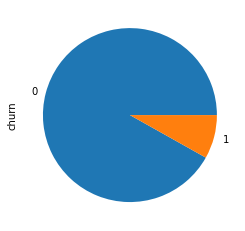

In [36]:
# plot the pie chart of churn vs non-churn

churn_per.plot(kind='pie')

#### Removing all columns related to 9th month data (column having _9 as suffix)

In [37]:
# Function to find the last month columns

def filter_9(column):
    if "_9" in column:
        return True
    else:
        return False

In [38]:
# Find out the list of all columns and then filetr out 9th month column. Include 'sep_vbc_3g' column as well

columns = list(tel_data.columns.values)
last_month_columns = list(filter(filter_9,columns))

last_month_columns = last_month_columns + ['sep_vbc_3g']

In [39]:
# Dropping the last month columns

tel_data.drop(axis=1, labels=last_month_columns, inplace=True)
tel_data.shape

(30001, 152)

In [40]:
tel_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803         0.00         0.00         0.00          0.00   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

## Step 4 - Derive new features

In [41]:
# Combining roaming incoming and outgoing

tel_data['roam_tot_mou_6'] = tel_data['roam_ic_mou_6'] + tel_data['roam_og_mou_6']
tel_data['roam_tot_mou_7'] = tel_data['roam_ic_mou_7'] + tel_data['roam_og_mou_7']
tel_data['roam_tot_mou_8'] = tel_data['roam_ic_mou_8'] + tel_data['roam_og_mou_8']

In [42]:
# Combining Operator T to T all calls (incoming, outgoing etc) for 6th, 7th and 8th months respectively

tel_data['total_t2t_mou_6'] = tel_data['loc_og_t2t_mou_6'] + tel_data['std_og_t2t_mou_6'] + tel_data['loc_ic_t2t_mou_6'] + tel_data['std_ic_t2t_mou_6']
tel_data['total_t2t_mou_7'] = tel_data['loc_og_t2t_mou_7'] + tel_data['std_og_t2t_mou_7'] + tel_data['loc_ic_t2t_mou_7'] + tel_data['std_ic_t2t_mou_7']
tel_data['total_t2t_mou_8'] = tel_data['loc_og_t2t_mou_8'] + tel_data['std_og_t2t_mou_8'] + tel_data['loc_ic_t2t_mou_8'] + tel_data['std_ic_t2t_mou_8']

In [43]:
# Combining Operator T to other operator mobile all calls (incoming, outgoing etc) for 6th, 7th and 8th months respectively

tel_data['total_t2m_mou_6'] = tel_data['loc_og_t2m_mou_6'] + tel_data['std_og_t2m_mou_6'] + tel_data['loc_ic_t2m_mou_6'] + tel_data['std_ic_t2m_mou_6']
tel_data['total_t2m_mou_7'] = tel_data['loc_og_t2m_mou_7'] + tel_data['std_og_t2m_mou_7'] + tel_data['loc_ic_t2m_mou_7'] + tel_data['std_ic_t2m_mou_7']
tel_data['total_t2m_mou_8'] = tel_data['loc_og_t2m_mou_8'] + tel_data['std_og_t2m_mou_8'] + tel_data['loc_ic_t2m_mou_8'] + tel_data['std_ic_t2m_mou_8']

In [44]:
# Combining Operator T to fixed lines of T all calls (incoming, outgoing etc) for 6th, 7th and 8th month respectively

tel_data['total_t2f_mou_6'] = tel_data['loc_og_t2f_mou_6'] + tel_data['std_og_t2f_mou_6'] + tel_data['loc_ic_t2f_mou_6'] + tel_data['std_ic_t2f_mou_6']
tel_data['total_t2f_mou_7'] = tel_data['loc_og_t2f_mou_7'] + tel_data['std_og_t2f_mou_7'] + tel_data['loc_ic_t2f_mou_7'] + tel_data['std_ic_t2f_mou_7']
tel_data['total_t2f_mou_8'] = tel_data['loc_og_t2f_mou_8'] + tel_data['std_og_t2f_mou_8'] + tel_data['loc_ic_t2f_mou_8'] + tel_data['std_ic_t2f_mou_8']

In [45]:
# combining data volume of 3g and 2g data for 6th, 7th and 8th month

tel_data['vol_data_mb_6'] = tel_data['vol_2g_mb_6'] + tel_data['vol_3g_mb_6']
tel_data['vol_data_mb_7'] = tel_data['vol_2g_mb_7'] + tel_data['vol_3g_mb_7']
tel_data['vol_data_mb_8'] = tel_data['vol_2g_mb_8'] + tel_data['vol_3g_mb_8']

In [46]:
# combining no of monthly data and schcet of 3g and 2g data for 6th, 7th and 8th month

tel_data['monthly_data_6'] = tel_data['monthly_2g_6'] + tel_data['monthly_3g_6'] + tel_data['sachet_2g_6'] +  tel_data['sachet_3g_6']
tel_data['monthly_data_7'] = tel_data['monthly_2g_7'] + tel_data['monthly_3g_7'] + tel_data['sachet_2g_7'] +  tel_data['sachet_3g_7']
tel_data['monthly_data_8'] = tel_data['monthly_2g_8'] + tel_data['monthly_3g_8'] + tel_data['sachet_2g_8'] +  tel_data['sachet_3g_8']

In [47]:
# combining incoming and outgoing call to own customer care

tel_data['tot_t2c_mou_6'] = tel_data['loc_og_t2c_mou_6'] + tel_data['std_og_t2c_mou_6']
tel_data['tot_t2c_mou_7'] = tel_data['loc_og_t2c_mou_7'] + tel_data['std_og_t2c_mou_7']
tel_data['tot_t2c_mou_8'] = tel_data['loc_og_t2c_mou_8'] + tel_data['std_og_t2c_mou_8']

In [48]:
# Combining Operator T to other operator fixed lines of O all calls 

tel_data['tot_t2o_mou'] = tel_data['loc_og_t2o_mou'] + tel_data['std_og_t2o_mou'] + tel_data['loc_ic_t2o_mou']

### Comments about dropping columns

- All the above individual columns will be dropped after combining and creating new feature
- Droping std_ic_t2o_mou_6. As only incoming data present for Telecom to other operator fixed line and doesn't add any value
- Drop circle_id and mobile_number
- Drop last_date_of_month_6, last_date_of_month_7, last_date_of_month_8
- Dropping date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8 as these are non important columns
- Drop below columns as we have total column already present
    - og_others_6, og_others_7, og_others_8
    - ic_others_6, ic_others_7, ic_others_8
- Drop below columns as total_rech_val columns contains this info already
    - total_rech_num_6, total_rech_num_7, total_rech_num_8, 
    - total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, 
    - max_rech_amt_6, max_rech_amt_7, max_rech_amt_8, 
    - av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, 
    - total_rech_data_6, total_rech_data_7 and total_rech_data_8 
- Dropping the below th columns as the total outgoing and incoming for each month (which is sum of the below columns) is already present in the data set.
    - loc_og_mou_6, std_og_mou_6, isd_og_mou_6, spl_og_mou_6
    - loc_ic_mou_6, std_ic_mou_6, isd_ic_mou_6, spl_ic_mou_6
    - loc_og_mou_7, std_og_mou_7, isd_og_mou_7, spl_og_mou_7
    - loc_ic_mou_7, std_ic_mou_7, isd_ic_mou_7, spl_ic_mou_7
    - loc_og_mou_8, std_og_mou_8, isd_og_mou_8, spl_og_mou_8
    - loc_ic_mou_8, std_ic_mou_8, isd_ic_mou_8, spl_ic_mou_8

### Drop columns as per above comments and create new df `telecom`

In [49]:
# dropping columns as per above comments and creating new dataframe

telecom = tel_data.drop(['roam_ic_mou_6', 'roam_og_mou_6', 
                          'roam_ic_mou_7', 'roam_og_mou_7', 
                          'roam_ic_mou_8', 'roam_og_mou_8',
                         'loc_og_t2t_mou_6', 'std_og_t2t_mou_6','loc_ic_t2t_mou_6', 'std_ic_t2t_mou_6',
                         'loc_og_t2t_mou_7', 'std_og_t2t_mou_7','loc_ic_t2t_mou_7', 'std_ic_t2t_mou_7',
                         'loc_og_t2t_mou_8', 'std_og_t2t_mou_8','loc_ic_t2t_mou_8', 'std_ic_t2t_mou_8',
                         'loc_og_t2m_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2m_mou_6', 'std_ic_t2m_mou_6',
                         'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2m_mou_7',
                         'loc_og_t2m_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_8',
                         'loc_og_t2f_mou_6', 'std_og_t2f_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2f_mou_6',
                         'loc_og_t2f_mou_7', 'std_og_t2f_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2f_mou_7',
                         'loc_og_t2f_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
                         'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8',
                         'monthly_2g_6', 'monthly_3g_6', 'monthly_2g_7', 'monthly_3g_7', 'monthly_2g_8', 'monthly_3g_8',
                         'sachet_2g_6', 'sachet_3g_6', 'sachet_2g_7', 'sachet_3g_7', 'sachet_2g_8', 'sachet_3g_8',
                         'loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
                         'loc_og_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
                         'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
                         'loc_ic_mou_6', 'std_ic_mou_6', 'isd_ic_mou_6', 'spl_ic_mou_6',
                         'loc_ic_mou_7', 'std_ic_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7',
                         'loc_ic_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8', 'spl_ic_mou_8',
                         'loc_og_t2c_mou_6', 'std_og_t2c_mou_6', 
                         'loc_og_t2c_mou_7', 'std_og_t2c_mou_7',
                         'loc_og_t2c_mou_8', 'std_og_t2c_mou_8',
                         'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
                         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7','std_ic_t2o_mou_8',
                         'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                         'circle_id', 'mobile_number',
                         'og_others_6', 'og_others_7', 'og_others_8',
                         'ic_others_6', 'ic_others_7', 'ic_others_8',
                         'date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8',
                         'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                         'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'av_rech_amt_data_6', 
                         'total_rech_data_6', 'av_rech_amt_data_7', 'total_rech_data_7', 'av_rech_amt_data_8', 
                         'total_rech_data_8'], axis=1)

In [50]:
telecom.sample(10)

arpu_6   arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
69414  388.732  437.711   748.923       266.53       163.94       142.04   
63965  772.527  569.952   248.855       437.29       280.06        25.63   
88574  577.658  586.386   354.811       151.08        69.11        81.03   
63755  732.737  416.519   754.548       560.19       343.56       788.51   
21181  606.434  705.380  1433.626      1649.43      1949.06       891.04   
5186   334.014  172.799   172.065         0.36         0.00         2.36   
87480  583.788  485.698   428.737        39.06       146.16       158.03   
45704  412.127  292.891   240.863        33.41         4.28        18.83   
2587   599.555  724.306   512.722        55.14        76.29        80.74   
70804  621.400  758.510   789.930         8.09        12.84         2.13   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  total_og_mou_6  \
69414        136.51        116.48         97.71          403.04   
63965       1178.14        402.46         97.38         1512.81   
88574        233.94        198.63        252.59          207.23   
63755        921.54        322.84        594.24         1393.89   
21181         16.06         24.89        154.38         1665.49   
5186          30.71          1.28          2.26           31.08   
87480        316.29        552.21        597.39          184.26   
45704         33.63         73.46         21.69           67.04   
2587         390.13        413.53        260.43          445.28   
70804        255.99        223.63        196.59          157.96   

       total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
69414          280.43          236.06          317.23          339.39   
63965          499.51            0.00          562.06          143.19   
88574          267.74          333.63          167.31          180.94   
63755          661.78         1326.49          921.63          667.61   
21181         1973.96         1045.43           17.49           30.99   
5186             1.28            4.63            7.41            8.36   
87480          698.38          756.89          199.18         1138.66   
45704           77.74           40.53           46.81            8.81   
2587           457.46          259.51          119.79           61.43   
70804          123.86          190.68          450.79          260.03   

       total_ic_mou_8  last_day_rch_amt_6  last_day_rch_amt_7  \
69414          168.51                 250                  33   
63965            0.00                 128                 110   
88574          392.14                 169                 154   
63755         1122.04                 110                 128   
21181           31.73                 110                 128   
5186            34.44                 198                 198   
87480         1116.78                 252                 128   
45704           30.24                 198                 198   
2587            66.73                 300                 150   
70804          586.01                   0                 220   

       last_day_rch_amt_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
69414                  33  3107     1893.76      565.43      410.53   
63965                   0   840        0.00        0.00        0.00   
88574                   0  1402      361.23     1515.22      389.32   
63755                 130  2372        0.00        0.00        0.00   
21181                 144   278        0.00        0.00        0.00   
5186                    0   300        0.00        0.00        0.00   
87480                   0  1191        0.00        0.00        0.00   
45704                 198  2816        0.00      422.53        0.00   
2587                    0  1036        0.00        0.00        0.00   
70804                   0   643     1430.52     1046.91      871.24   

       total_rech_val_6  total_rech_val_7  total_rech_val_8  avg_rech_amt  \
69414             805.0             451.0            2

In [51]:
# checking the value count of tot_t2o_mou column

telecom.tot_t2o_mou.value_counts()

0.0    30001
Name: tot_t2o_mou, dtype: int64

In [52]:
# dropping the above column and also dropping '_vbc_3g' etc for jun, jul and aug as this is not useful column 

telecom = telecom.drop(['tot_t2o_mou',  
                          'aug_vbc_3g', 'jul_vbc_3g','jun_vbc_3g'],axis=1)

In [53]:
# reset the index

telecom.reset_index(inplace=True, drop=True)

telecom.shape

(30001, 45)

In [54]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              30001 non-null  float64
 1   arpu_7              30001 non-null  float64
 2   arpu_8              30001 non-null  float64
 3   onnet_mou_6         30001 non-null  float64
 4   onnet_mou_7         30001 non-null  float64
 5   onnet_mou_8         30001 non-null  float64
 6   offnet_mou_6        30001 non-null  float64
 7   offnet_mou_7        30001 non-null  float64
 8   offnet_mou_8        30001 non-null  float64
 9   total_og_mou_6      30001 non-null  float64
 10  total_og_mou_7      30001 non-null  float64
 11  total_og_mou_8      30001 non-null  float64
 12  total_ic_mou_6      30001 non-null  float64
 13  total_ic_mou_7      30001 non-null  float64
 14  total_ic_mou_8      30001 non-null  float64
 15  last_day_rch_amt_6  30001 non-null  int64  
 16  last

## Step 5. Visualising the Data 

#### Univariate and Bivariate analysis

- We will extract the numeric and categorical coulmns.
- Will plot histogram for numeric variables and bar plot (using value_count for categorical columns)

In [55]:
# find out the list of numeric and categorical columns from telecom dataset

num_list = []
cat_list = []

# for all columns in telecom df find numeric and categorical column
for column in telecom:
    if is_numeric_dtype(telecom[column]):
        num_list.append(column)
    elif is_string_dtype(telecom[column]):
        cat_list.append(column)


print(num_list)
print(cat_list)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'aon', 'total_rech_val_6', 'total_rech_val_7', 'total_rech_val_8', 'avg_rech_amt', 'churn', 'roam_tot_mou_6', 'roam_tot_mou_7', 'roam_tot_mou_8', 'total_t2t_mou_6', 'total_t2t_mou_7', 'total_t2t_mou_8', 'total_t2m_mou_6', 'total_t2m_mou_7', 'total_t2m_mou_8', 'total_t2f_mou_6', 'total_t2f_mou_7', 'total_t2f_mou_8', 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'monthly_data_6', 'monthly_data_7', 'monthly_data_8', 'tot_t2c_mou_6', 'tot_t2c_mou_7', 'tot_t2c_mou_8']
[]


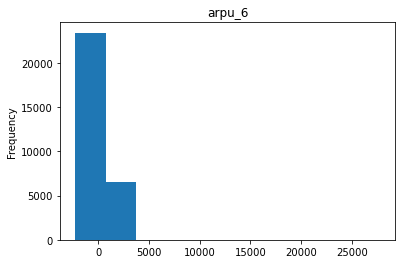

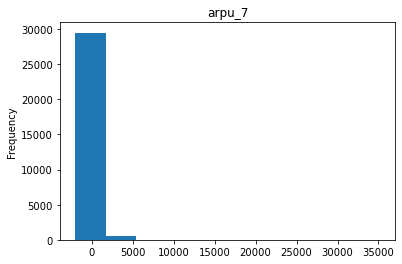

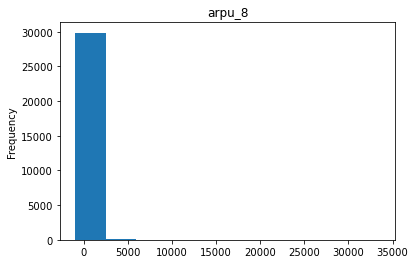

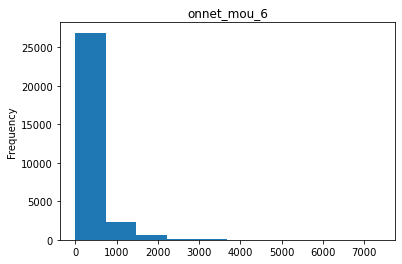

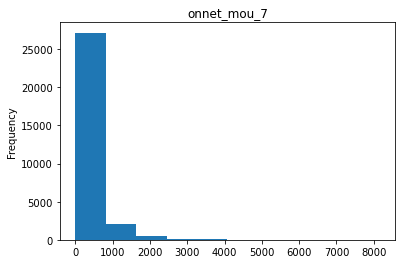

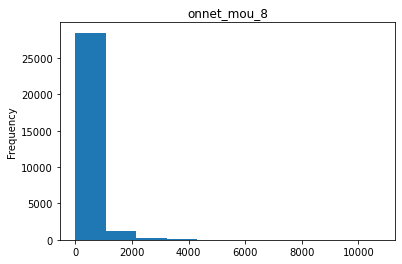

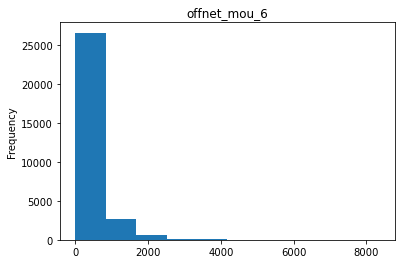

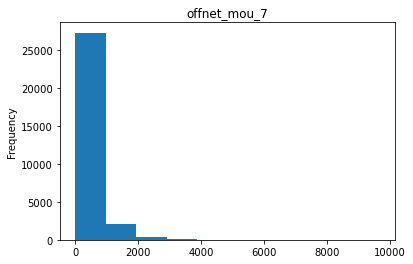

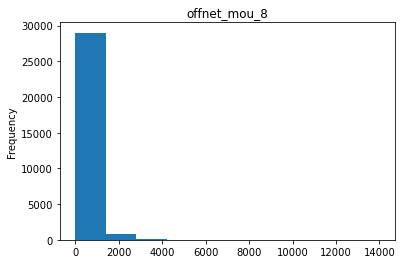

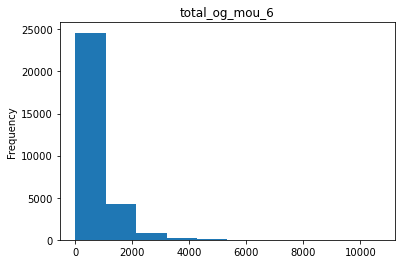

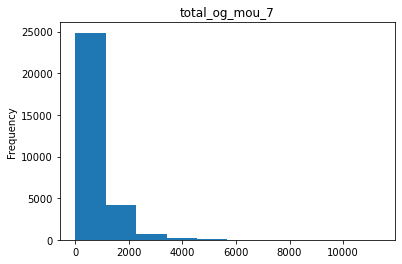

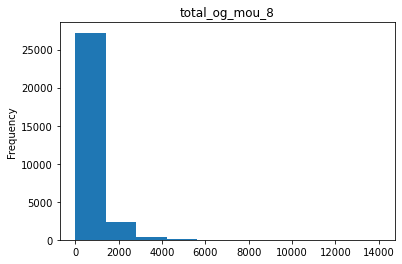

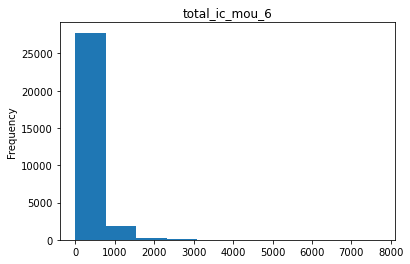

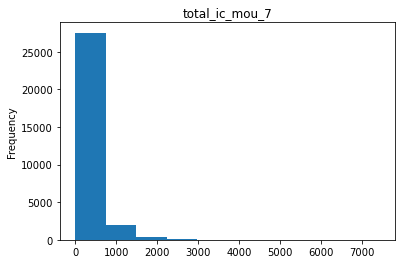

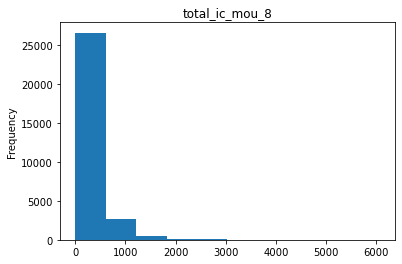

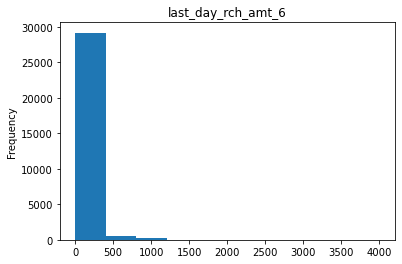

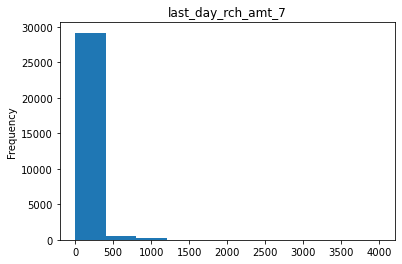

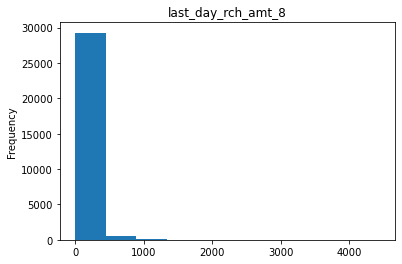

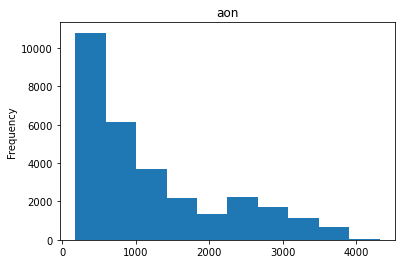

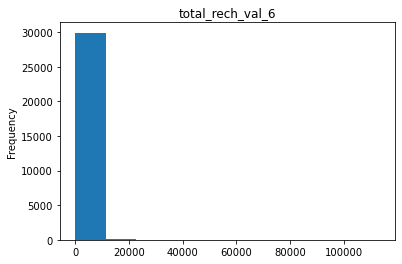

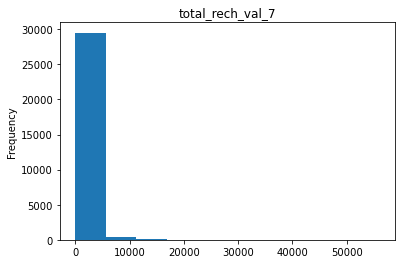

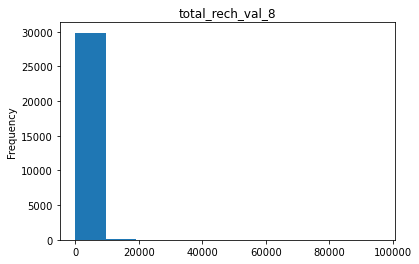

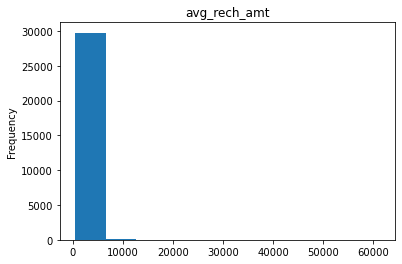

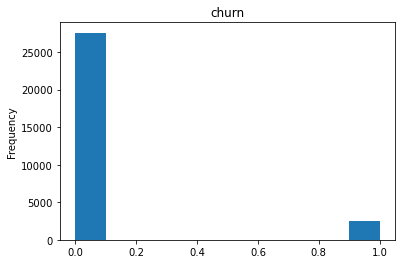

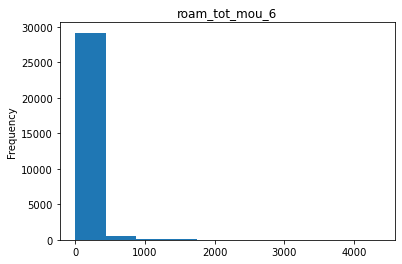

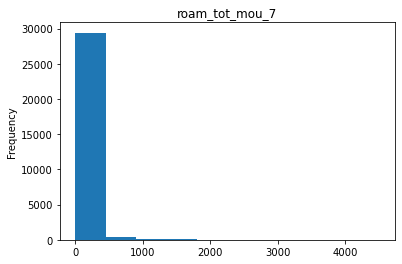

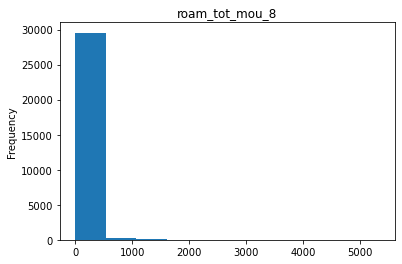

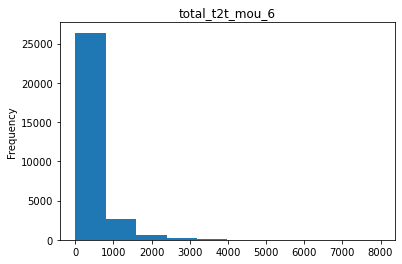

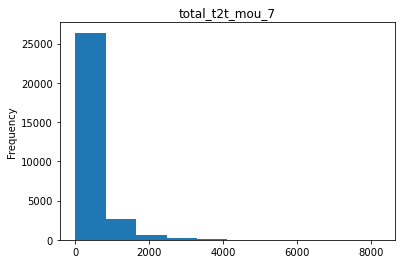

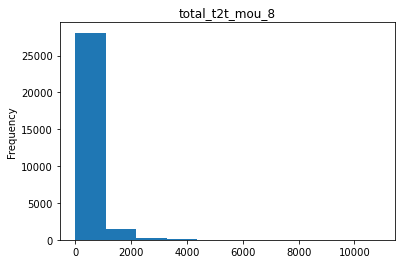

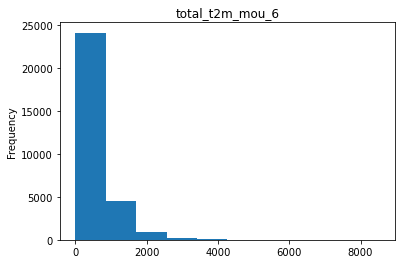

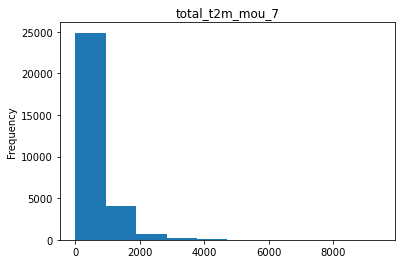

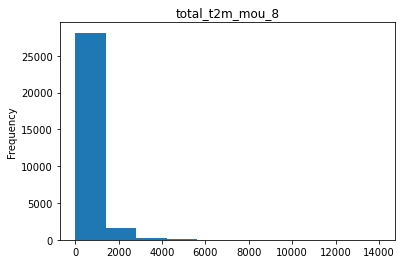

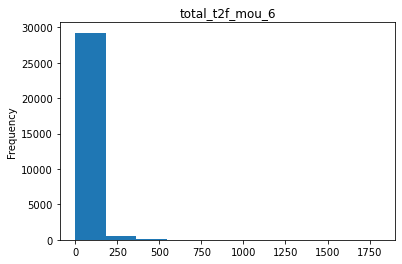

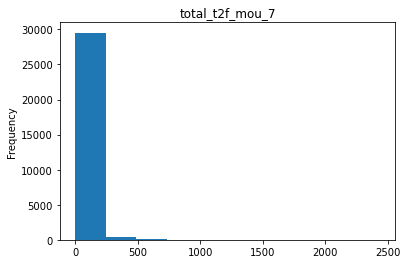

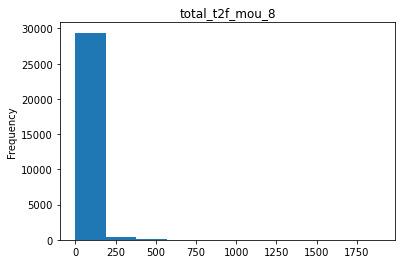

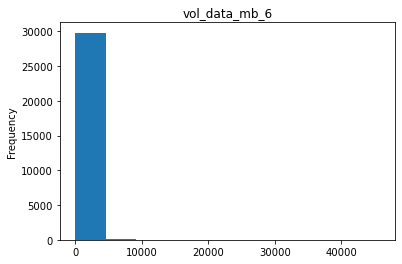

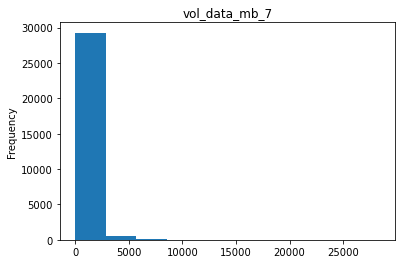

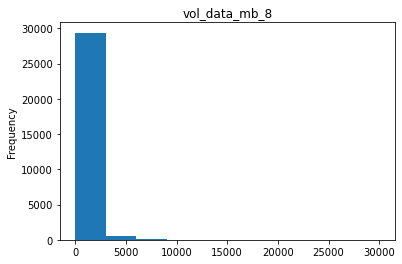

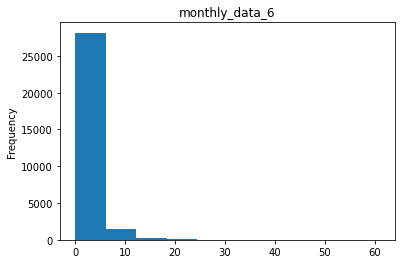

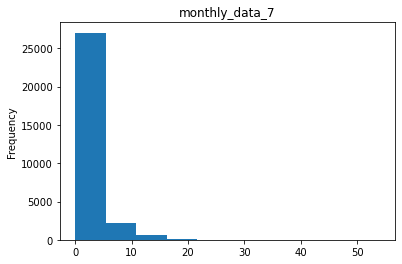

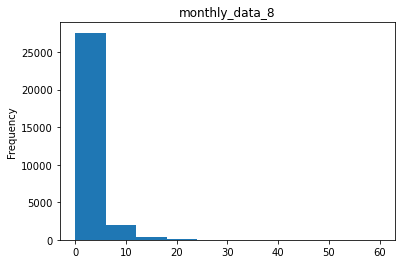

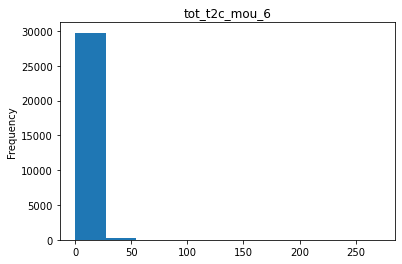

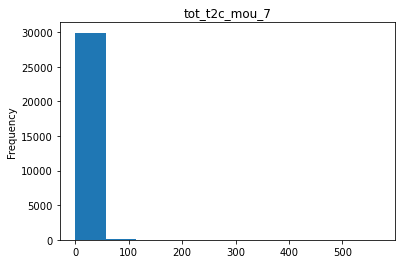

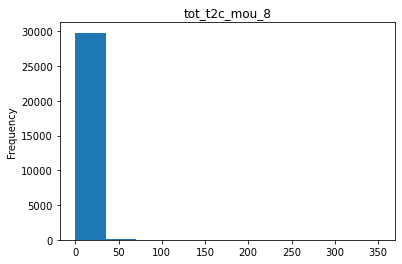

In [56]:
# let's plot all the numeric columns

for column in telecom:
    if is_numeric_dtype(telecom[column]):
        plt.figure(column)
        plt.title(column)
        telecom[column].plot(kind = 'hist')
    
plt.show()

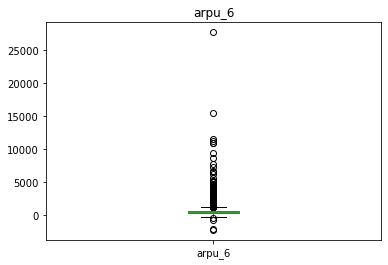

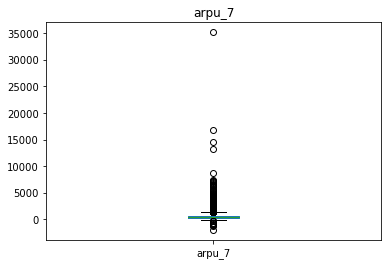

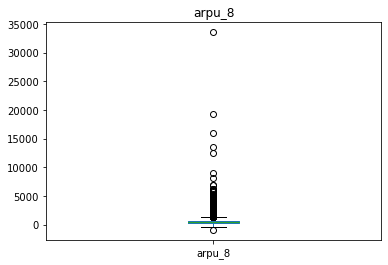

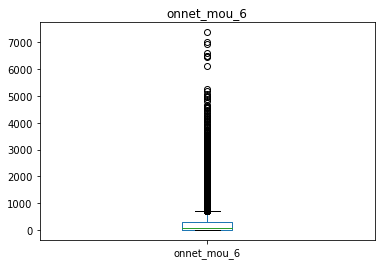

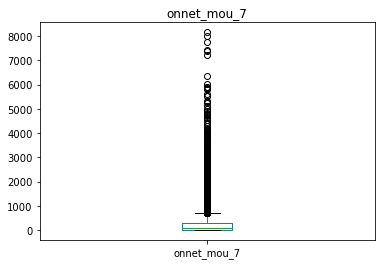

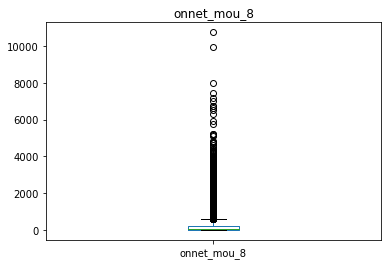

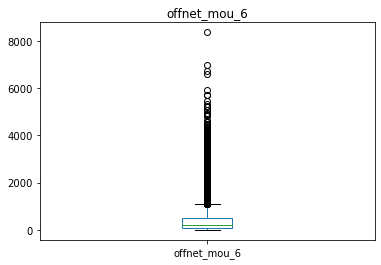

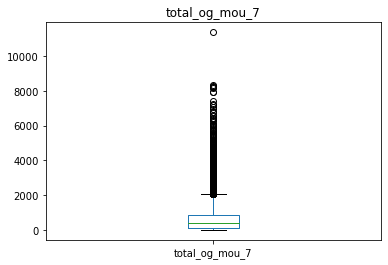

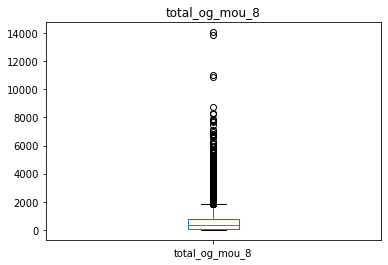

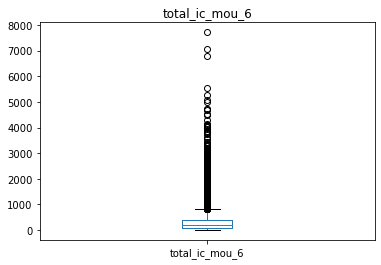

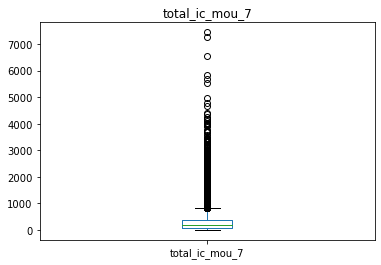

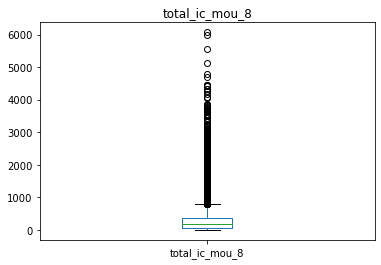

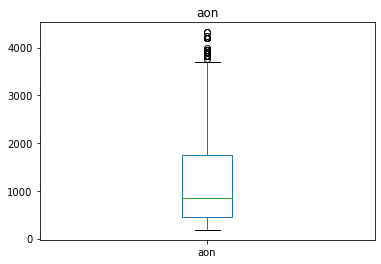

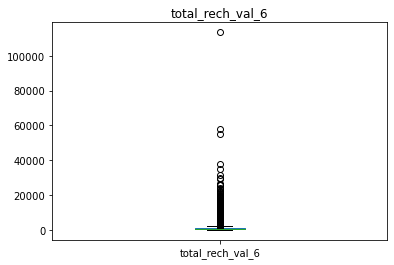

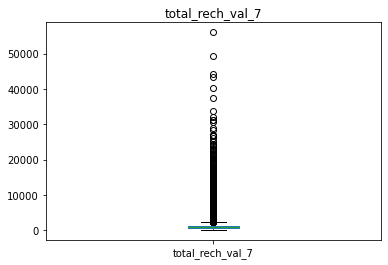

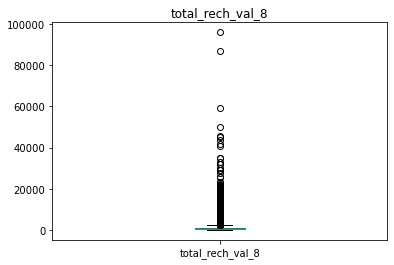

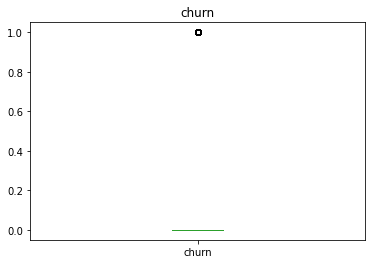

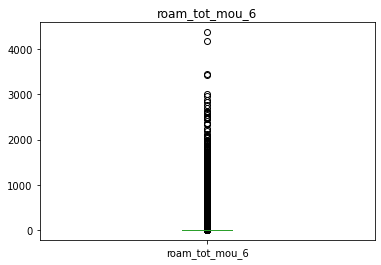

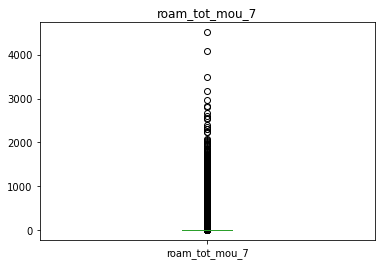

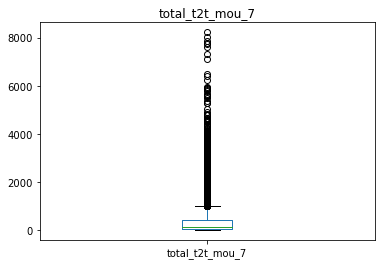

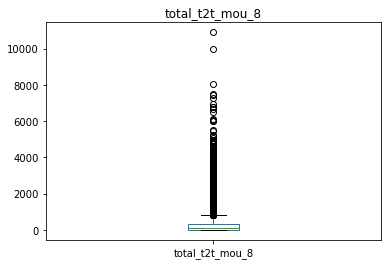

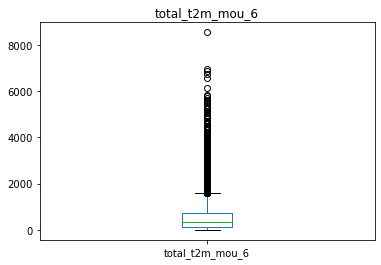

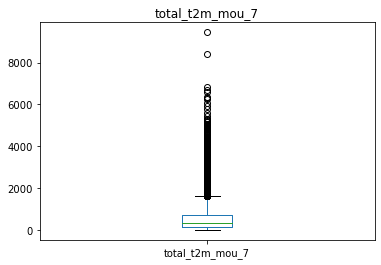

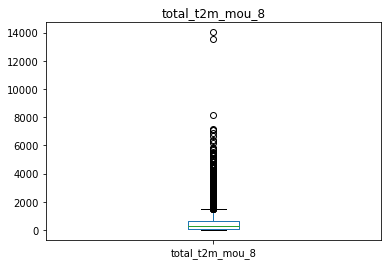

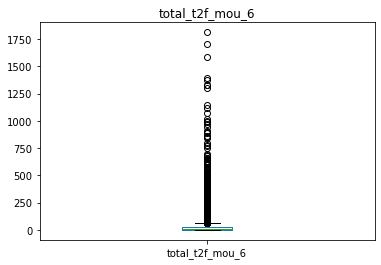

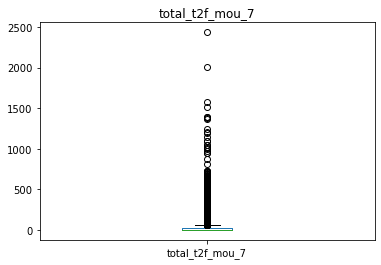

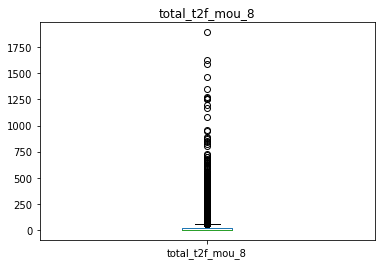

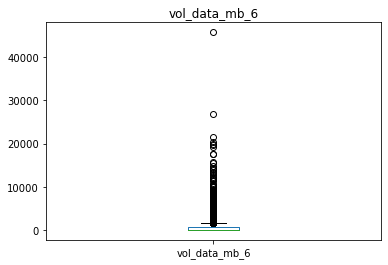

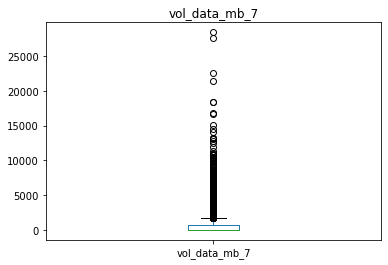

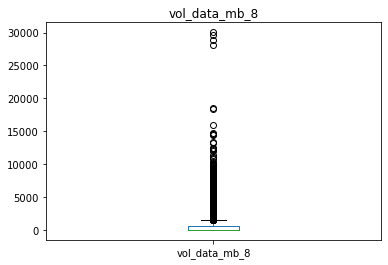

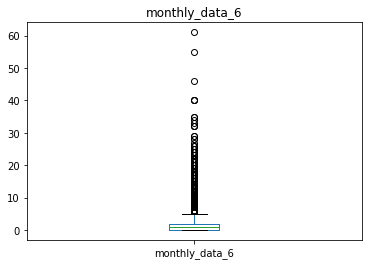

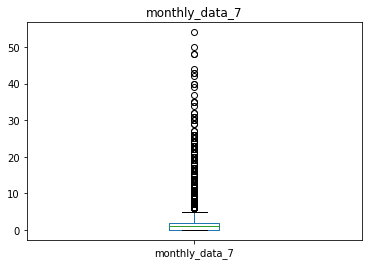

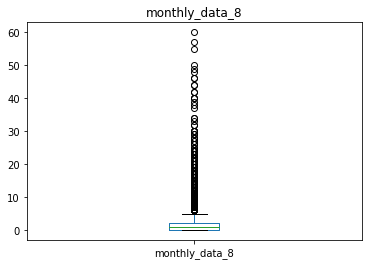

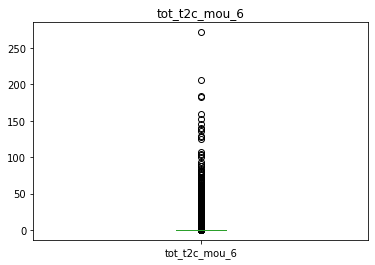

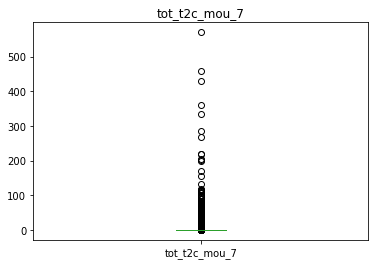

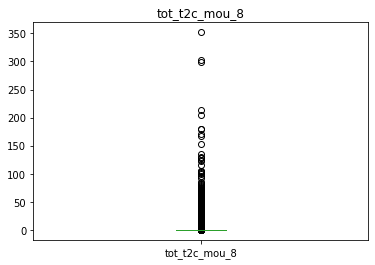

In [57]:
# Plotting the box plot of the variables
for column in telecom:
    if is_numeric_dtype(telecom[column]):
        plt.figure(column)
        plt.title(column)
        telecom[column].plot(kind = 'box')
plt.show()

## Outlier treatment
- As per boxplot above it looks the dataset is having some outliers
- we will check the describe at different percentile to see outliers

In [58]:
# Checking outliers at 1%, 10%, 25%,50%,75%,90%,95% and 99%

telecom.describe(percentiles=[0.01,.10,.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    260.793024    267.819295   
std      460.640461    479.776947    501.961981    459.644368    479.993989   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
1%         1.000000      0.700000      0.000000      0.000000      0.000000   
10%      171.605000    177.886000     84.000000      0.700000      0.580000   
25%      309.865000    309.826000    231.473000     17.080000     16.030000   
50%      481.694000    480.943000    427.585000     84.580000     82.810000   
75%      699.943000    698.315000    661.491000    290.440000    290.240000   
90%      994.099000    995.859000    977.345000    754.160000    784.480000   
95%     1240.964000   1261.272000   1255.019000   1135.440000   1185.790000   
99%     1985.115000   1999.500000   1986.622000   2151.740000   2201.960000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  total_og_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000   
mean     234.112539    373.693961    378.103169    335.077044      609.866251   
std      458.448598    482.523558    498.923555    482.062509      690.873430   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
1%         0.000000      0.000000      0.000000      0.000000        0.000000   
10%        0.000000     11.260000     10.430000      2.200000       10.760000   
25%       10.390000     71.610000     69.910000     46.740000      116.580000   
50%       65.610000    222.540000    220.030000    182.790000      410.630000   
75%      239.960000    487.940000    494.010000    438.890000      858.760000   
90%      665.080000    895.830000    916.080000    823.680000     1447.080000   
95%     1074.590000   1256.610000   1272.290000   1167.540000     1913.480000   
99%     2159.110000   2326.360000   2410.890000   2193.130000     3195.290000   
max    10752.560000   8362.360000   9667.130000  14007.340000    10674.030000   

       total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
count    30001.000000    30001.000000    30001.000000    30001.000000   
mean       628.366047      551.678812      289.950496      296.756987   
std        717.219171      700.478180      365.523475      373.747232   
min          0.000000        0.000000        0.000000        0.000000   
1%           0.000000        0.000000        0.000000        0.000000   
10%         10.080000        0.210000       18.190000       22.210000   
25%        116.490000       72.360000       72.880000       78.990000   
50%        425.590000      333.540000      183.730000      187.580000   
75%        891.440000      774.780000      371.990000      377.310000   
90%       1481.160000     1359.590000      665.110000      673.230000   
95%       1951.760000     1857.080000      922.080000      929.310000   
99%       3280.960000     3219.810000     1736.010000     1801.410000   
max      11365.310000    14043.060000     7716.140000     7442.860000   

       total_ic_mou_8  last_day_rch_amt_6  last_day_rch_amt_7  \
count    30001.000000        30001.000000        30001.000000   
mean       279.922931          100.893604          100.356021   
std        361.175175          143.737572          140.925669   
min          0.000000            0.000000            0.000000   
1%           0.000000            0.000000            0.000000   
10%          6.250000            0.000000            0.000000   
25%         61.360000           25.000000           20.000000   
50%        173.110000           67.000000           50.000000   
75%        361.730000          120.000000          130.000000   
90%        650.230000          250.000000          250.000000   
95%        915.690000          25

In [59]:
telecom.shape

(30001, 45)

### Comment about outliers

- As we can see in the above box plots, there are outliers in the dataset. For almost all columns there is sudden increase in max value as compare to 99 percentile value. Also, for arpu_6, arpu_7 and arpu_8 there are outliers at minimum value.
- We will remove the outlier value from arpu_6, arpu_7 and arpu_8 at lower end (remove value less than 1 percentile)
- Also, We will remove the outlier at higher end (remove value greater than 99 percentile)

In [60]:
# Remove the outlier at lower end (less than 1 percentile) for arpu_6, arpu_7 and arpu_8

telecom = telecom[telecom.arpu_6 > telecom.arpu_6.quantile(.01)]
telecom = telecom[telecom.arpu_7 > telecom.arpu_7.quantile(.01)]
telecom = telecom[telecom.arpu_8 > telecom.arpu_8.quantile(.01)]

Fixing the ouliers in the total_og_mou columns fixes the outliers in the onnet_mou and offset_mou columns as well

In [61]:
# for all columns remove outlier at higher end (> 99 percentile)

col_list = ['arpu_6', 'arpu_7','arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 
            'last_day_rch_amt_6', 'last_day_rch_amt_7','last_day_rch_amt_8',
            'total_rech_val_6','total_rech_val_7','total_rech_val_8', 
            'total_t2f_mou_6', 'total_t2f_mou_7', 'total_t2f_mou_8', 
            'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'tot_t2c_mou_6','tot_t2c_mou_7','tot_t2c_mou_8']

for var in col_list:
    telecom = telecom[telecom[var] < telecom[var].quantile(.99)]

By fixing the outliers in the above columns, most of the columns outliers are getting treated

In [62]:
# Checking outliers at 10%, 25%,50%,75%,90%,95% and 99% again

telecom.describe(percentiles=[0.01,.10,.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  22958.000000  22958.000000  22958.000000  22958.000000  22958.000000   
mean     498.608232    496.722642    448.405722    237.355679    239.603010   
std      274.653956    266.575354    284.318542    360.233297    363.388609   
min        1.080000      1.320000      0.010000      0.000000      0.000000   
1%        44.182560     50.820490      4.000000      0.000000      0.000000   
10%      178.750000    186.487300    116.712000      1.710000      1.430000   
25%      306.289500    306.458750    237.860000     19.515000     18.240000   
50%      462.099500    461.998000    411.427500     87.145000     85.090000   
75%      640.916000    638.830000    604.887000    287.802500    286.940000   
90%      856.735400    850.132000    825.561700    703.884000    723.381000   
95%     1012.251250    992.289500    977.220750   1032.454500   1050.600500   
99%     1354.237870   1320.761350   1312.882310   1683.599800   1695.918600   
max     1910.306000   1763.824000   1702.968000   2746.360000   2563.940000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  total_og_mou_6  \
count  22958.000000  22958.000000  22958.000000  22958.000000    22958.000000   
mean     206.260094    336.358789    336.718128    297.790598      551.527537   
std      329.862565    372.439401    368.780035    341.790749      527.776390   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
1%         0.000000      0.000000      0.000000      0.000000        0.000000   
10%        0.610000     16.310000     15.231000      8.230000       18.530000   
25%       13.745000     75.565000     73.890000     54.617500      129.387500   
50%       69.185000    217.720000    215.750000    183.690000      411.085000   
75%      237.210000    461.100000    466.252500    415.255000      814.582500   
90%      619.141000    808.016000    830.733000    742.820000     1287.981000   
95%      945.209500   1087.493000   1098.774500   1002.714500     1626.755500   
99%     1566.439500   1772.275000   1713.023500   1594.393700     2288.999100   
max     2343.780000   3098.490000   2650.490000   3080.740000     2788.760000   

       total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
count    22958.000000    22958.000000    22958.000000    22958.000000   
mean       560.332779      488.325347      279.796106      286.352729   
std        525.508573      494.069261      344.661844      352.420075   
min          0.000000        0.000000        0.000000        0.000000   
1%           0.000000        0.000000        0.000000        0.000000   
10%         17.937000        6.360000       25.340000       29.151000   
25%        128.090000       91.040000       78.465000       84.832500   
50%        425.110000      338.565000      183.835000      188.555000   
75%        846.005000      740.237500      357.425000      360.580000   
90%       1313.854000     1213.035000      618.254000      627.696000   
95%       1621.876000     1528.481000      857.740000      871.261500   
99%       2185.155000     2069.743500     1663.632000     1719.616400   
max       2640.630000     2380.980000     7716.140000     7442.860000   

       total_ic_mou_8  last_day_rch_amt_6  last_day_rch_amt_7  \
count    22958.000000        22958.000000        22958.000000   
mean       272.220479           84.401298           86.003310   
std        341.278772           78.960244           82.532205   
min          0.000000            0.000000            0.000000   
1%           0.000000            0.000000            0.000000   
10%         18.168000            0.000000            0.000000   
25%         71.467500           25.000000           23.000000   
50%        177.185000           59.000000           50.000000   
75%        348.412500          110.000000          128.000000   
90%        610.880000          198.000000          198.000000   
95%        858.257000          25

In [63]:
telecom.shape

(22958, 45)

In [64]:
# calculate the percentage of churn again

churn_per = telecom.churn.value_counts(1)*100
churn_per

0    94.171966
1     5.828034
Name: churn, dtype: float64

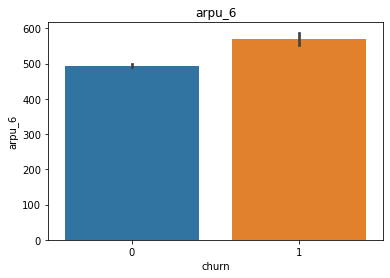

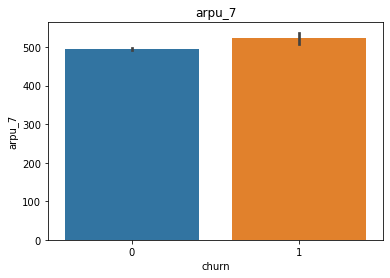

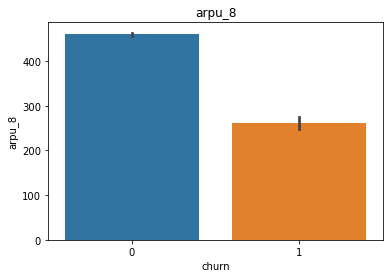

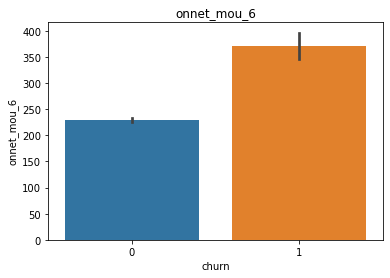

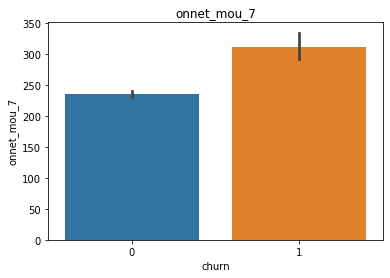

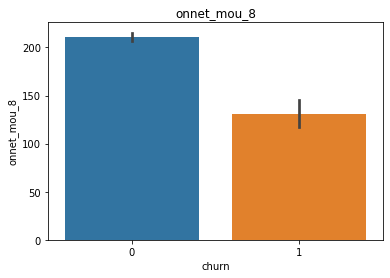

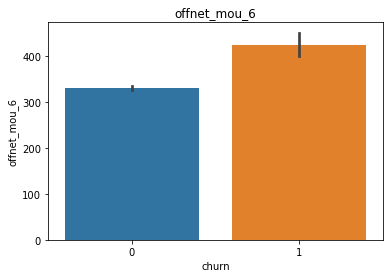

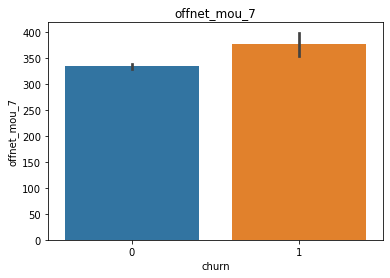

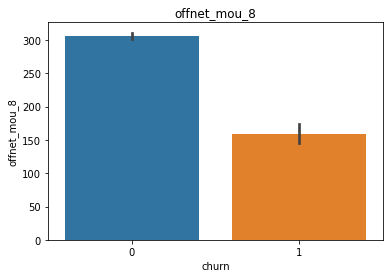

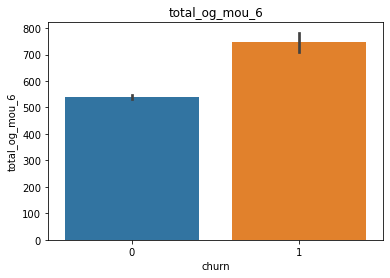

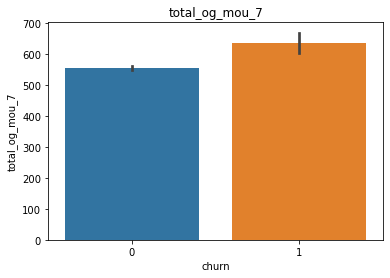

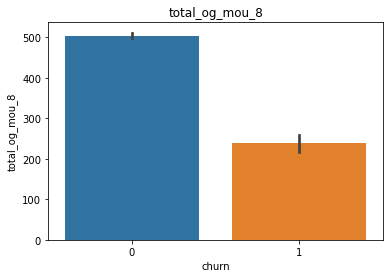

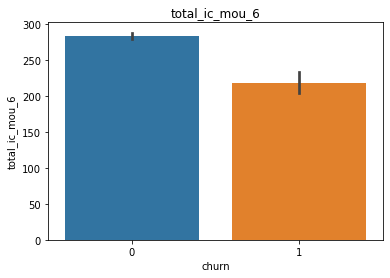

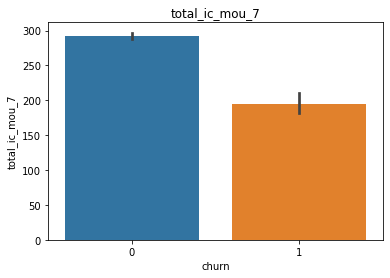

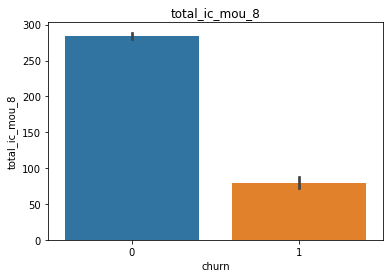

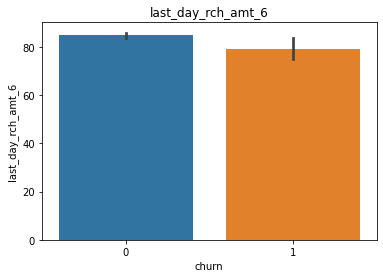

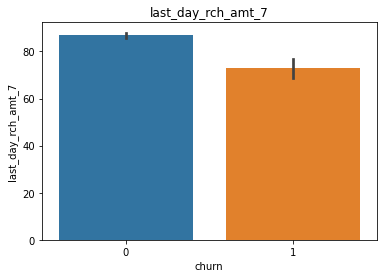

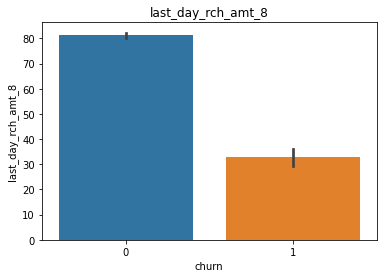

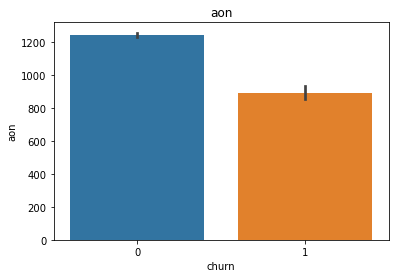

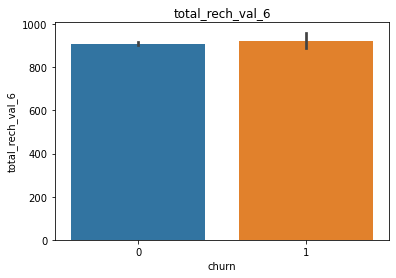

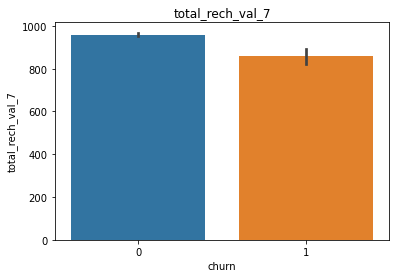

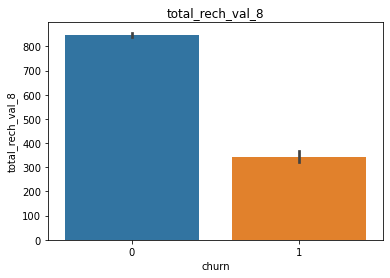

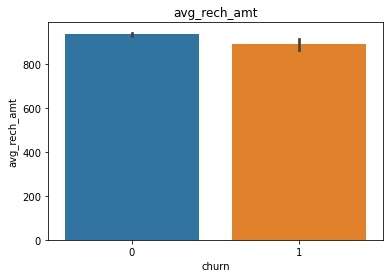

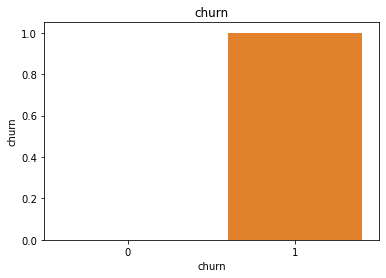

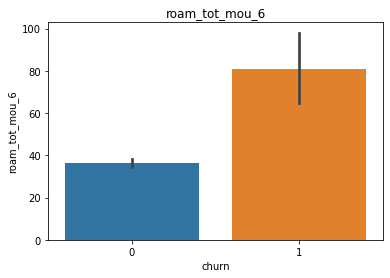

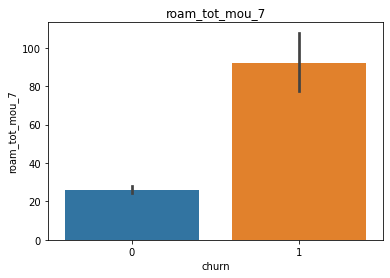

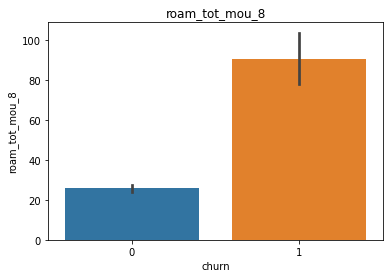

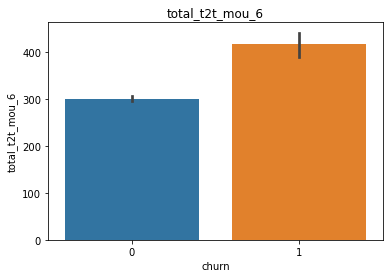

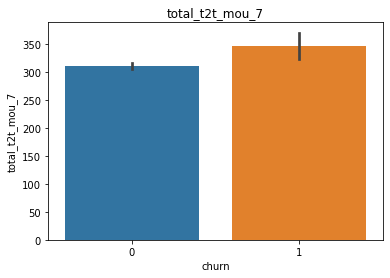

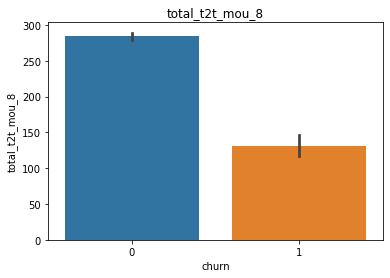

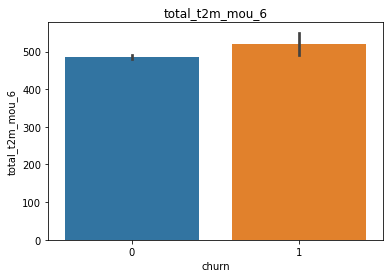

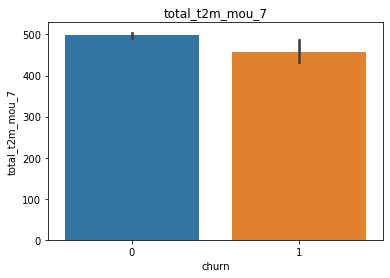

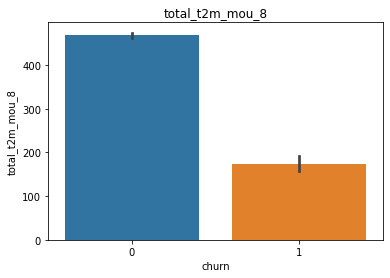

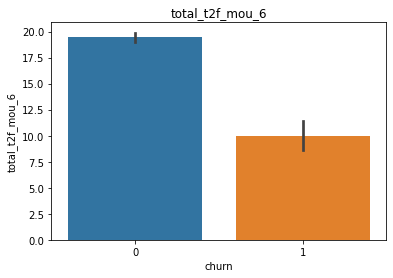

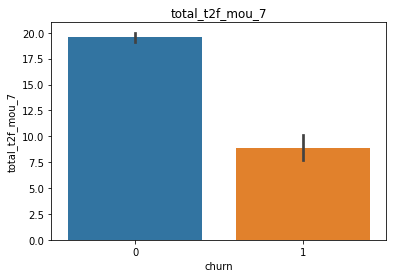

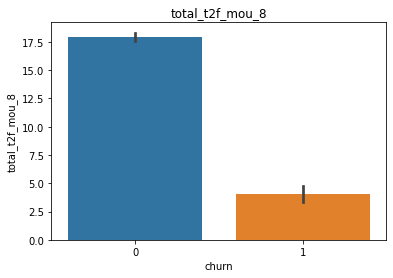

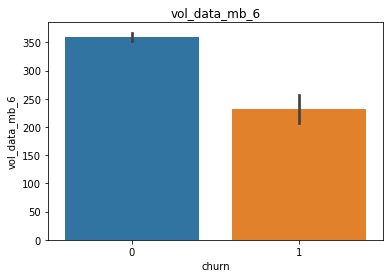

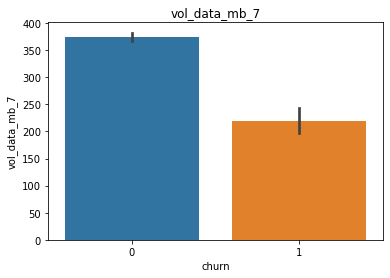

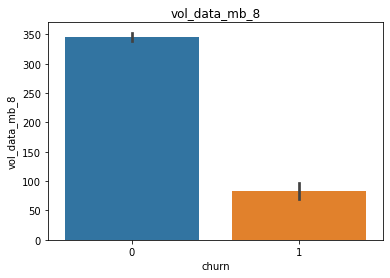

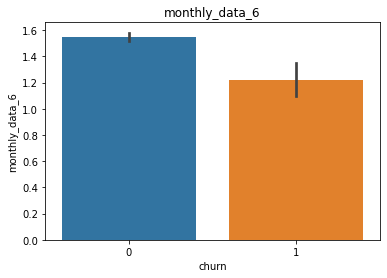

In [65]:
# Plotting average value of each column against the churn

for column in telecom:
    if is_numeric_dtype(telecom[column]):
        plt.figure(column)
        plt.title(column)
        sns.barplot(data = telecom, x = 'churn', y = column, estimator = np.mean)
plt.show()

### observation 

- From the above plots, it is very clear that the average value of the columns is decreasing as the month is increasing for the churn case.
- For example, arpu average values are around 650, 550 and 200 for the months 6, 7 and 8 respectively in the chrun case and it remained constant at 550 for the three months in the non-churn case

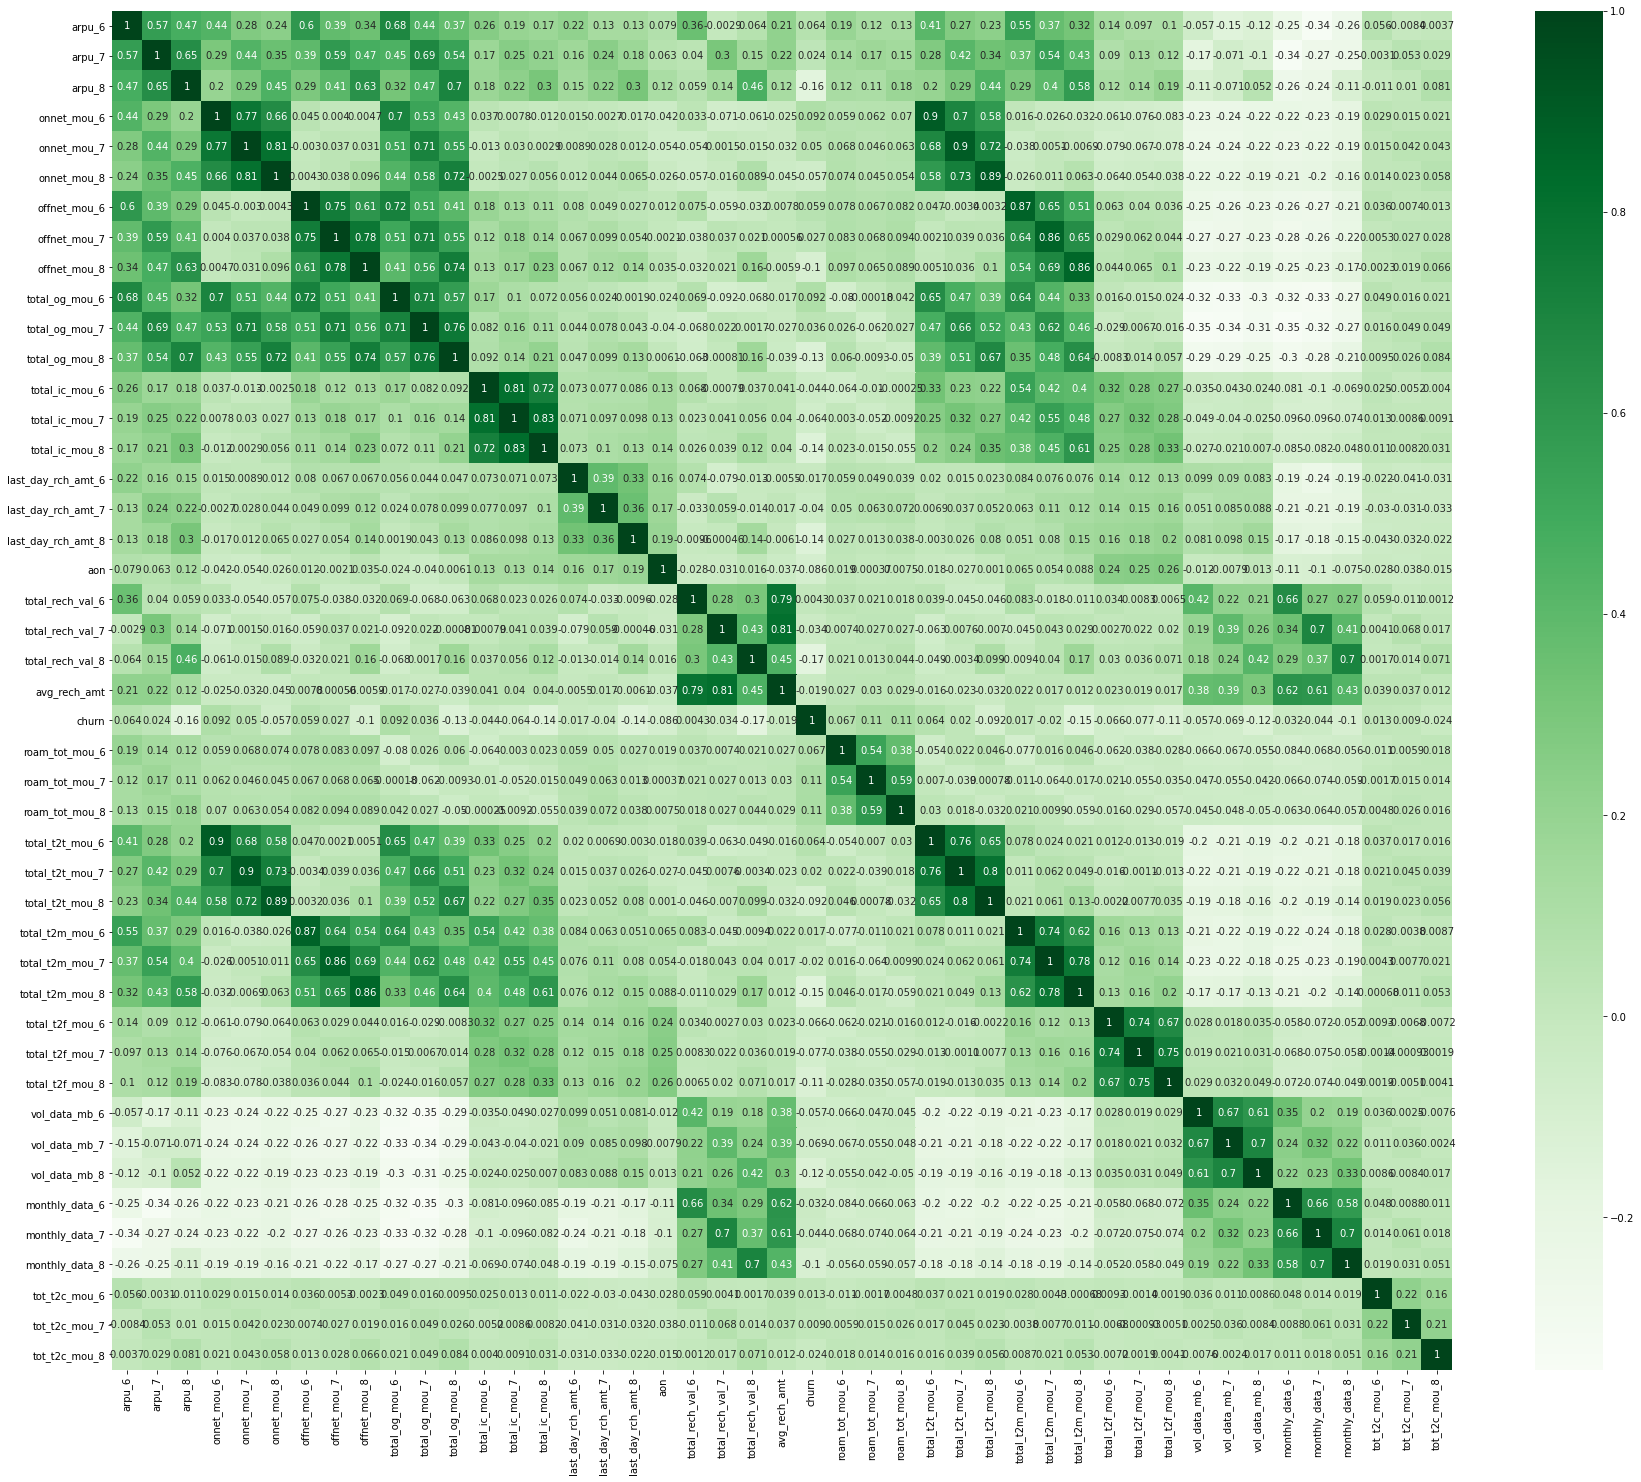

In [66]:
# create correlation matrix and plot heatmap

plt.figure(figsize=(30,25))

correlation = telecom.corr()

sns.heatmap(correlation, cmap = "Greens", annot = True)

plt.show()

### Observation from heatmap

From the above heat map, we can find that there are some values which are higly correlated. We will be investing them further and remove some of the columns, if needed.

In [67]:
# To find the features which are more correlated
# We are using the 85% correlation as the cutoff and filtering the features which are correlated with and above this cutoff

correlation_cutoff = 0.85

for column in correlation:
    rows = list(correlation.loc[(correlation[column] >= correlation_cutoff) | (correlation[column] <= -correlation_cutoff)].index)
    for row in rows:
        if row != column:
            print(row,column)

total_t2t_mou_6 onnet_mou_6
total_t2t_mou_7 onnet_mou_7
total_t2t_mou_8 onnet_mou_8
total_t2m_mou_6 offnet_mou_6
total_t2m_mou_7 offnet_mou_7
total_t2m_mou_8 offnet_mou_8
onnet_mou_6 total_t2t_mou_6
onnet_mou_7 total_t2t_mou_7
onnet_mou_8 total_t2t_mou_8
offnet_mou_6 total_t2m_mou_6
offnet_mou_7 total_t2m_mou_7
offnet_mou_8 total_t2m_mou_8


If the highly correlated varaibles are from the same month, then we will drop either one of them. So with that in mind we are dropping the following variables

- total_t2t_mou_6
- total_t2t_mou_7
- total_t2t_mou_8 
- total_t2m_mou_6
- total_t2m_mou_7
- total_t2m_mou_8 

We are also dropping the *total_rech_val_6* and *total_rech_val_7* columns as it is highly correlated with the avg_rech_amt

In [68]:
# drop the columns as per above comment

telecom.drop(['total_t2t_mou_6', 'total_t2t_mou_7', 'total_t2t_mou_8', 
              'total_t2m_mou_6', 'total_t2m_mou_7', 'total_t2m_mou_8', 
              'total_rech_val_6', 'total_rech_val_7'], axis=1, inplace=True)

In [69]:
# reset the index and check the shape

telecom.reset_index(inplace=True, drop=True)
telecom.shape

(22958, 37)

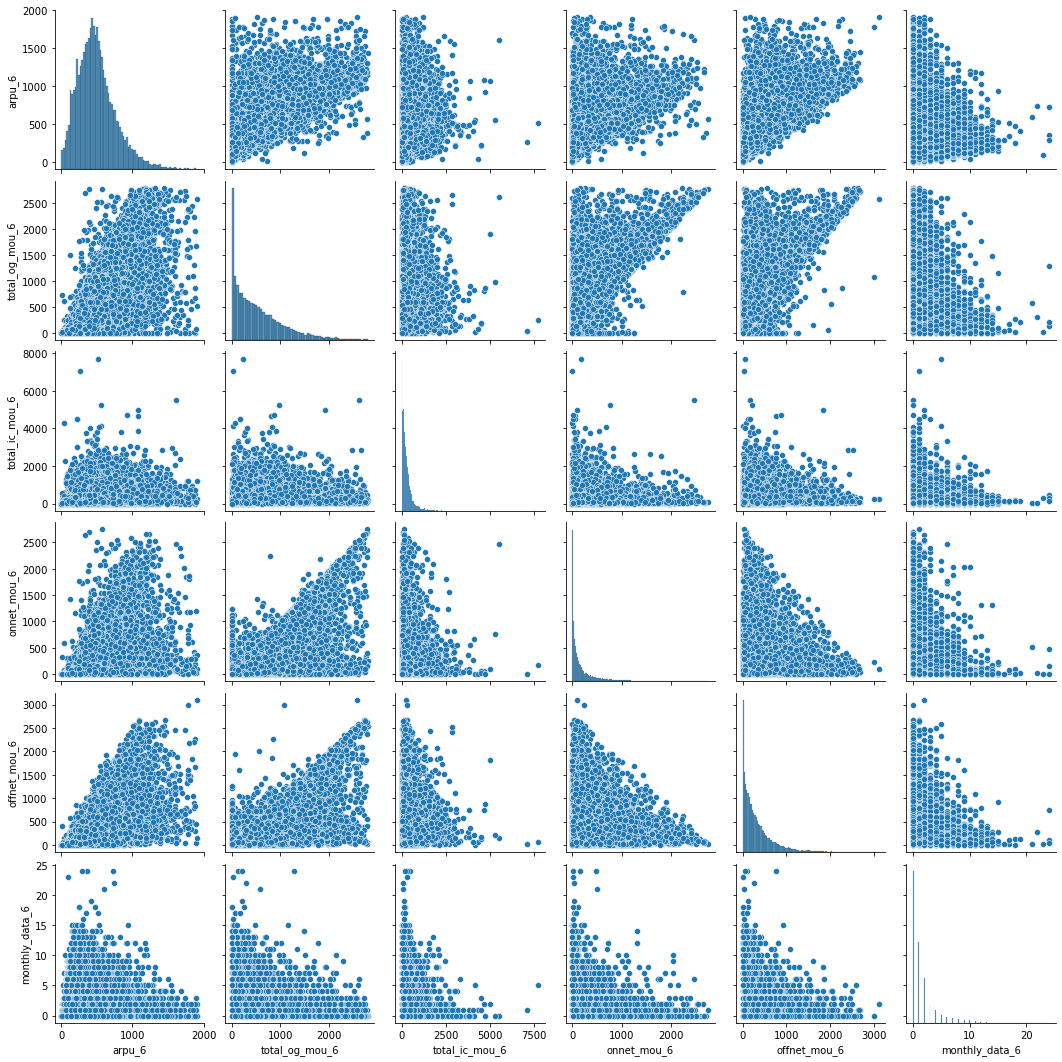

In [70]:
#Plotting the pair-plot between the important variables in the 6th month

sns.pairplot(telecom[['arpu_6', 'total_og_mou_6', 'total_ic_mou_6', 'onnet_mou_6', 'offnet_mou_6', 'monthly_data_6']])

#### From the above plot, we can see that the onnet_mou_6 and offnet_mou_6 are positively correlated with total_og_mout_6

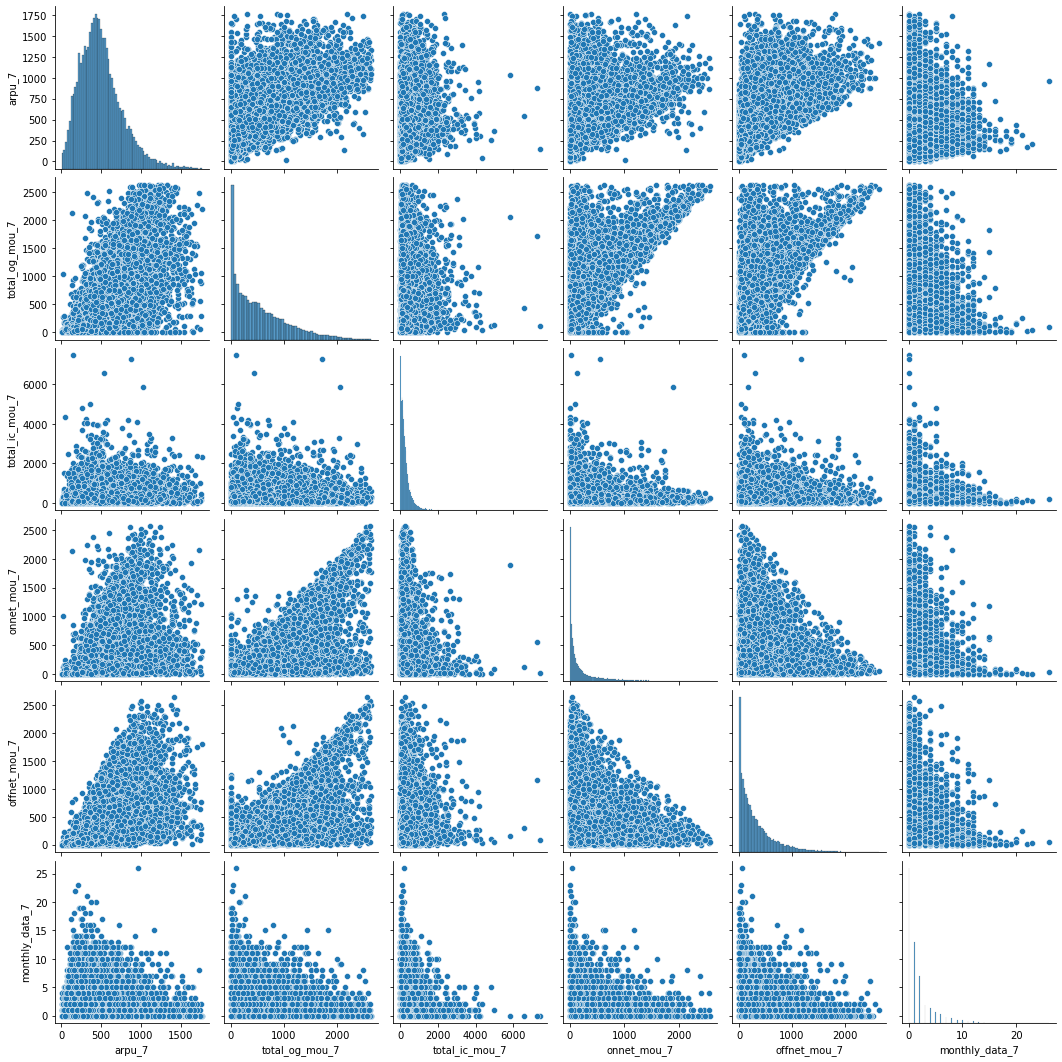

In [71]:
#Plotting the pair-plot between the important variables in the 7th month

sns.pairplot(telecom[['arpu_7', 'total_og_mou_7', 'total_ic_mou_7', 'onnet_mou_7', 'offnet_mou_7', 'monthly_data_7']])

#### From the above plot, we can see that the onnet_mou_7 and offnet_mou_7 are positively correlated with total_og_mout_7

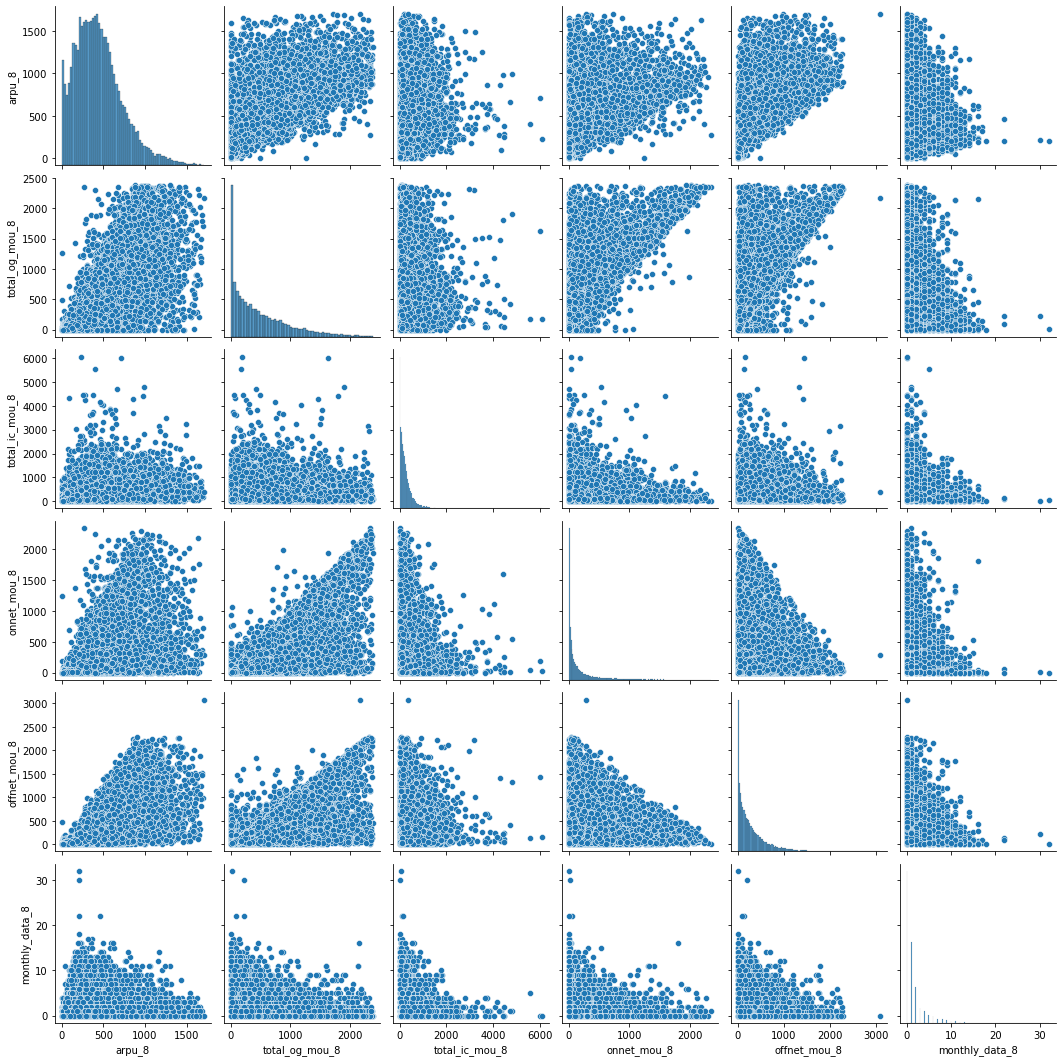

In [72]:
#Plotting the pair-plot between the important variables in the 8th month

sns.pairplot(telecom[['arpu_8', 'total_og_mou_8', 'total_ic_mou_8', 'onnet_mou_8', 'offnet_mou_8', 'monthly_data_8']])

#### From the above plot, we can see that the onnet_mou_8 and offnet_mou_8 are positively correlated with total_og_mout_8

## Step 6 - Model Building 

As part of this case study we will be creating two models
1. Use PCA for dimesionality reduction and the use Random Forest to create model
2. Use logistic regression to create 2nd model which will give the importarnt predictor for churn

For both model we will use `telecom` dataframe as our base dataset and build model by spliting test and train 

### Step 6a - Model building with PCA

Steps:-
- Feature standardisation
- train test split
- PCA on data
- build the random forest model
- hyperparameter tuning
- final model

In [73]:
# in order to apply feature standardisation we will split the churn and rest of feature and then apply the standardisation 
# and concatenate the dataset again

tel_2 = telecom['churn']
tel_1 = telecom.drop(['churn'],axis=1)

In [74]:
# tel_1 head

tel_1.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803         0.00         0.00         0.00   
1  378.721  492.223  137.362       413.69       351.03        35.08   
2  514.453  597.753  637.760       102.41       132.11        85.14   
3   74.350  193.897  366.966        48.96        50.66        33.58   
4  363.987  486.558  393.909       248.99       619.96       666.38   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  total_og_mou_6  total_og_mou_7  \
0          0.00          0.00          0.00            0.00            0.00   
1         94.66         80.63        136.48          508.36          431.66   
2        757.93        896.68        983.39          860.34         1028.79   
3         85.41         89.36        205.89          134.38          140.04   
4         88.86         50.58         97.81          337.86          670.54   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0            0.00            0.00            0.00            5.44   
1          171.56          103.86           28.49           16.54   
2         1068.54          207.09          131.89          261.04   
3          239.48          119.58          222.89          298.33   
4          764.19           70.79           67.94           49.64   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8   aon  \
0                 252                 252                 252   968   
1                  50                   0                  10   315   
2                  30                  20                  50   720   
3                   0                 179                   0   604   
4                  20                  20                 130  1155   

   total_rech_val_8  avg_rech_amt  roam_tot_mou_6  roam_tot_mou_7  \
0             504.0         559.0             0.0             0.0   
1             327.0         696.0             0.0             0.0   
2             718.0         640.0             0.0             0.0   
3             979.0         583.0             0.0             0.0   
4             416.0         528.0             0.0             0.0   

   roam_tot_mou_8  total_t2f_mou_6  total_t2f_mou_7  total_t2f_mou_8  \
0             0.0             0.00             0.00             1.15   
1             0.0             0.00             0.00             0.00   
2             0.0             5.36             2.84            11.97   
3             0.0             0.00             0.00             0.71   
4             0.0             0.00             0.00             0.00   

   vol_data_mb_6  vol_data_mb_7  vol_data_mb_8  monthly_data_6  \
0          113.7         152.08         115.36               1   
1            0.0        1106.95          11.97               0   
2            0.0           0.00           0.00               0   
3            0.0         599.57        1009.93               0   
4            0.0           0.00           0.00               0   

   monthly_data_7  monthly_data_8  tot_t2c_mou_6  tot_t2c_mou_7  tot_t2c_mou_8  
0               1               1            0.0            0.0           0.00  
1               2               3            0.0            0.0           7.15  
2               0               0            0.0            0.0           0.00  
3               2               2            0.0            0.0          17.71  
4               0               0            0.0            0.0           0.00

In [75]:
# apply standardisation on tel_1 df and then concatenate with tel_2 df to create new df tel_new

tel_1 =(tel_1 - tel_1.mean())/tel_1.std()

tel_new = pd.concat([tel_1, tel_2], axis=1)

tel_new.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -1.096737 -1.057512 -0.825140    -0.658894    -0.659358    -0.625291   
1 -0.436503 -0.016879 -1.093997     0.489500     0.306633    -0.518944   
2  0.057690  0.378994  0.665993    -0.374606    -0.295807    -0.367184   
3 -1.544701 -1.135985 -0.286438    -0.522982    -0.519948    -0.523491   
4 -0.490149 -0.038130 -0.191675     0.032297     1.046695     1.394884   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  total_og_mou_6  total_og_mou_7  \
0     -0.903124     -0.913060     -0.871266       -1.045002       -1.066268   
1     -0.648961     -0.694420     -0.471957       -0.081791       -0.244854   
2      1.131919      1.518417      2.005904        0.585120        0.891436   
3     -0.673798     -0.670747     -0.268880       -0.790387       -0.799783   
4     -0.664534     -0.775905     -0.585097       -0.404845        0.209715   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0       -0.988374       -0.811799       -0.812532       -0.781708   
1       -0.641136       -0.510460       -0.731691       -0.749184   
2        1.174359       -0.210949       -0.438292       -0.032761   
3       -0.503665       -0.464850       -0.180077        0.076505   
4        0.558352       -0.606409       -0.619751       -0.652195   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8       aon  \
0            2.122571            2.011296            2.108769 -0.267953   
1           -0.435679           -1.042058           -0.830979 -0.947782   
2           -0.688971           -0.799728           -0.345070 -0.526142   
3           -1.068909            1.126793           -0.952456 -0.646908   
4           -0.815617           -0.799728            0.626747 -0.073270   

   total_rech_val_8  avg_rech_amt  roam_tot_mou_6  roam_tot_mou_7  \
0         -0.454311     -0.691410       -0.250127       -0.215233   
1         -0.710374     -0.437463       -0.250127       -0.215233   
2         -0.144722     -0.541266       -0.250127       -0.215233   
3          0.232861     -0.646923       -0.250127       -0.215233   
4         -0.581619     -0.748872       -0.250127       -0.215233   

   roam_tot_mou_8  total_t2f_mou_6  total_t2f_mou_7  total_t2f_mou_8  \
0       -0.219958        -0.564355        -0.586999        -0.560387   
1       -0.219958        -0.564355        -0.586999        -0.600764   
2       -0.219958        -0.404271        -0.499065        -0.180491   
3       -0.219958        -0.564355        -0.586999        -0.575836   
4       -0.219958        -0.564355        -0.586999        -0.600764   

   vol_data_mb_6  vol_data_mb_7  vol_data_mb_8  monthly_data_6  \
0      -0.450719      -0.404573      -0.423348       -0.224790   
1      -0.665451       1.401557      -0.626444       -0.649925   
2      -0.665451      -0.692232      -0.649957       -0.649925   
3      -0.665451       0.441851       1.333912       -0.649925   
4      -0.665451      -0.692232      -0.649957       -0.649925   

   monthly_data_7  monthly_data_8  tot_t2c_mou_6  tot_t2c_mou_7  \
0       -0.274370       -0.200872      -0.339735      -0.353584   
1        0.121245        0.653368      -0.339735      -0.353584   
2       -0.669985       -0.627991      -0.339735      -0.353584   
3        0.121245        0.226248      -0.339735      -0.353584   
4       -0.669985       -0.627991      -0.339735      -0.353584   

   tot_t2c_mou_8  churn  
0      -0.351661      1  
1       2.040265      0  
2      -0.351661      0  
3       5.572957      0  
4      -0.351661      0

### Splitting Data into Training and Test Sets

In [76]:
# Putting feature variable to X
X = tel_new.drop(['churn'],axis=1)

# Putting response variable to y
y = tel_new['churn']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [77]:
# Splitting the data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

## PCA on the data

In [78]:
# shape of train dataset

X_train.shape

(16070, 36)

In [79]:
pca = PCA(random_state=42)

In [80]:
# fit the X_train

pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [81]:
# PCA components

pca.components_

array([[ 2.37510200e-01,  2.61780025e-01,  2.35316990e-01, ...,
         6.25025698e-04,  4.51248856e-03,  1.71860945e-02],
       [ 8.73182504e-02,  1.14965247e-01,  1.81998476e-01, ...,
         9.92329860e-03,  2.01127000e-03,  1.02037332e-02],
       [ 7.88643011e-02,  1.30996357e-01,  1.74179374e-01, ...,
         3.71605583e-02,  5.95778527e-02,  6.67901385e-02],
       ...,
       [ 1.20543638e-03,  3.50735138e-03,  5.00462514e-03, ...,
        -1.52312669e-03, -1.13525695e-03, -1.44044359e-04],
       [-6.96182136e-03,  1.27508956e-03,  5.89606860e-03, ...,
        -2.98582595e-04,  2.98865006e-05, -4.44919442e-04],
       [ 3.22381377e-03, -5.94141448e-03,  3.88389300e-03, ...,
        -8.78628319e-04,  5.80489632e-04, -2.39885653e-04]])

In [82]:
#Looking at the explained variance ratio for each component

pca.explained_variance_ratio_

array([2.09110282e-01, 1.08713225e-01, 9.03996178e-02, 6.44085038e-02,
       6.27440803e-02, 5.07904277e-02, 4.49621445e-02, 4.09644707e-02,
       3.89684083e-02, 2.87822790e-02, 2.52335454e-02, 2.32702152e-02,
       2.22343186e-02, 2.18698406e-02, 1.88858400e-02, 1.80421317e-02,
       1.66147695e-02, 1.56092383e-02, 1.55323881e-02, 1.13775426e-02,
       1.00555116e-02, 9.26178280e-03, 8.13241919e-03, 7.72059408e-03,
       6.08189011e-03, 5.85607174e-03, 5.58162601e-03, 4.05577681e-03,
       3.93047062e-03, 3.31235624e-03, 3.16936556e-03, 2.49428616e-03,
       1.65820192e-03, 1.12248054e-04, 4.04869566e-05, 2.36427180e-05])

### Drawing scree plot

In [83]:
# Making a scree plot for the explained variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)

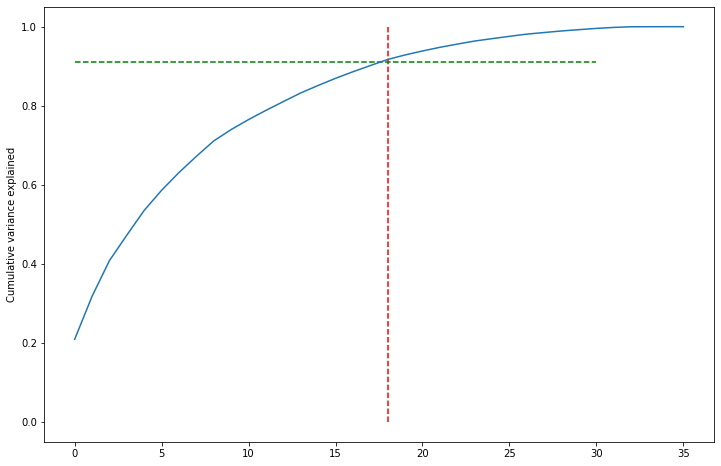

In [84]:
# plot a scree plot

fig = plt.figure(figsize=[12,8])
plt.vlines(x=18, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.91, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with automatic selection

In [85]:
# we will select PCs which explained 90% variance

pca = PCA(0.90)

In [86]:
# fit and transform X_train data

X_train_pca = pca.fit_transform(X_train)

In [87]:
# shape of new X_train_pca

X_train_pca.shape

(16070, 18)

In [88]:
# transform X_test data

X_test_pca = pca.transform(X_test)
X_test_pca.shape

(6888, 18)

In [89]:
# create dataframe just better visualization
df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2","PC3", "PC4","PC5", "PC6","PC7", "PC8","PC9", 
                                        "PC10","PC11","PC12", "PC13","PC14", "PC15","PC16","PC17", "PC18"])
df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.302331 -2.034492 -1.816188  0.012806  1.184538  3.255108 -1.151501   
1  0.342665  3.573697 -0.650228  0.210749 -1.266334  0.678093  2.745830   
2  0.468589  1.435016 -2.031165  0.795606  0.541454 -0.084833  0.274040   
3  5.166514 -0.308223  1.430230 -1.764496 -0.088436 -1.150580  0.478602   
4  0.785971 -0.791764 -0.443842 -1.553204  0.006274 -0.249965 -0.208749   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.824220 -1.046839 -0.898361  0.041333 -0.189553 -1.152759  0.880755   
1 -1.430771  0.708318 -0.759813  0.158678 -0.620186 -1.126329 -0.060290   
2 -1.396051 -0.206586  0.988255  0.073358  0.550013 -1.677690  0.662291   
3  0.399707 -0.820183 -0.119668  0.363705  0.156076 -0.480703  0.217441   
4  0.270766 -0.610483 -0.723643 -0.558273  0.130138  0.050105  0.121837   

       PC15      PC16      PC17      PC18  
0 -0.845259 -0.650235  0.983066 -0.504917  
1 -0.762016  1.076176 -0.658044  1.061713  
2  0.282895  2.101878 -1.725144 -0.523552  
3 -0.335470  0.202058 -0.663945  0.562040  
4  0.338925 -0.002496 -1.614641 -0.989078

### Building Random Forest model on the data on our Principal components

In [90]:
# build the first model using random parameters

rf = RandomForestClassifier(max_depth=4, n_estimators=15, random_state = 42, oob_score=True)

In [91]:
# fit the model

rf.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=4, n_estimators=15, oob_score=True,
                       random_state=42)

In [92]:
# oob score

rf.oob_score_

0.9427504667081519

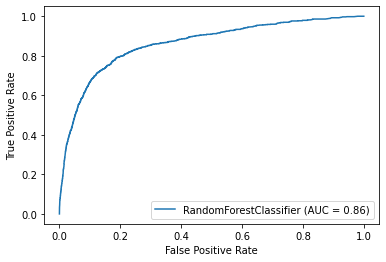

In [93]:
# AUC curve

plot_roc_curve(rf, X_train_pca, y_train)
plt.show()

In [94]:
# Define a function to check Train and test accuracy score and confusion matrix

def evaluate_model(rf_classifier):
    print("************ Random Forest Model Metrics *************")
    print("Train Accuracy :", accuracy_score(y_train, rf_classifier.predict(X_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, rf_classifier.predict(X_train_pca)))
    print("*"*55)
    print("Test Accuracy :", accuracy_score(y_test, rf_classifier.predict(X_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, rf_classifier.predict(X_test_pca)))
    print("********  classification report for train set *********")
    print(classification_report(y_train, rf_classifier.predict(X_train_pca)))
    print("********  classification report for test set *********")
    print(classification_report(y_test, rf_classifier.predict(X_test_pca)))

In [95]:
# call the function to evaluate the model

evaluate_model(rf)

************ Random Forest Model Metrics *************
Train Accuracy : 0.9428126944617299
Train Confusion Matrix:
[[15151     0]
 [  919     0]]
*******************************************************
Test Accuracy : 0.9391695702671312
Test Confusion Matrix:
[[6469    0]
 [ 419    0]]
********  classification report for train set *********
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15151
           1       0.00      0.00      0.00       919

    accuracy                           0.94     16070
   macro avg       0.47      0.50      0.49     16070
weighted avg       0.89      0.94      0.92     16070

********  classification report for test set *********
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6469
           1       0.00      0.00      0.00       419

    accuracy                           0.94      6888
   macro avg       0.47      0.50      0.48      6888
wei

### From above metrice we can see the recall and f1 score is zero. This is happening because of class imbalance.

## Treating class imbalace

- We know this dataset is highly imbalanced (95% non-churn and only 5% churn)
- We will apply different option of class weighting and select best method

#### Random Forest With Class Weighting

In [96]:
# random forest with class_weight='balanced'

rf_cw1 = RandomForestClassifier(max_depth=4, n_estimators=15,
                            random_state = 100, class_weight='balanced', oob_score=True)

In [97]:
#fit the above model

rf_cw1.fit(X_train_pca, y_train)
rf_cw1.oob_score_

0.8165525824517735

In [98]:
# ROC plot

plot_roc_curve(rf_cw1, X_train_pca, y_train)
plt.show()

In [99]:
# call the function to evaluate the model

evaluate_model(rf_cw1)

************ Random Forest Model Metrics *************
Train Accuracy : 0.8406969508400747
Train Confusion Matrix:
[[12825  2326]
 [  234   685]]
*******************************************************
Test Accuracy : 0.8307200929152149
Test Confusion Matrix:
[[5456 1013]
 [ 153  266]]
********  classification report for train set *********
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     15151
           1       0.23      0.75      0.35       919

    accuracy                           0.84     16070
   macro avg       0.60      0.80      0.63     16070
weighted avg       0.94      0.84      0.88     16070

********  classification report for test set *********
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6469
           1       0.21      0.63      0.31       419

    accuracy                           0.83      6888
   macro avg       0.59      0.74      0.61      6888
wei

### Random Forest With Bootstrap Class Weight

In [100]:
# running the model again with class_weight='balanced_subsample'

rf_cw2 = RandomForestClassifier(max_depth=4, n_estimators=15, 
                            random_state = 100, class_weight='balanced_subsample', oob_score=True)

In [101]:
# fit the model

rf_cw2.fit(X_train_pca, y_train)
rf_cw2.oob_score_

0.8189172370877411

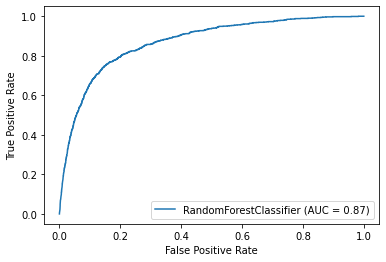

In [102]:
# ROC curve

plot_roc_curve(rf_cw2, X_train_pca, y_train)
plt.show()

In [103]:
# evaluate the model 

evaluate_model(rf_cw2)

************ Random Forest Model Metrics *************
Train Accuracy : 0.8433727442439328
Train Confusion Matrix:
[[12864  2287]
 [  230   689]]
*******************************************************
Test Accuracy : 0.8330429732868757
Test Confusion Matrix:
[[5475  994]
 [ 156  263]]
********  classification report for train set *********
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     15151
           1       0.23      0.75      0.35       919

    accuracy                           0.84     16070
   macro avg       0.61      0.80      0.63     16070
weighted avg       0.94      0.84      0.88     16070

********  classification report for test set *********
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      6469
           1       0.21      0.63      0.31       419

    accuracy                           0.83      6888
   macro avg       0.59      0.74      0.61      6888
wei

### conclusing about class_weight
- Using class_weight parameter has increased the recall value
- Among the two class_weight parameter the recall value for test set increased slightly for 'balanced_subsample'
- We will use class_weight='balanced_subsample'

### hyperparameter tuning

In [104]:
# Random forest with some parameters

rf_h1 = RandomForestClassifier(random_state=100, n_jobs=-1, class_weight='balanced_subsample')

In [105]:
# defining parameters - we will use max_depth, min_sample_leaf, n_estimators

params = {
    'max_depth':[3,5,8],
    'min_samples_leaf':[50,100,120],
    'n_estimators':[60,80,100,120]
    }

In [106]:
# Use grid search CV with cross validation as 5

grid_search = GridSearchCV(estimator=rf_h1,
                          param_grid=params,
                          cv=5,
                          n_jobs=-1,
                          verbose=1,
                          scoring = 'recall')
                            

In [107]:
# fit the model

grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.1min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8],
                         'min_samples_leaf': [50, 100, 120],
                         'n_estimators': [60, 80, 100, 120]},
             scoring='recall', verbose=1)

In [108]:
# find the best score

grid_search.best_score_

0.7225825611784271

In [109]:
# finding the best parameters

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       min_samples_leaf=100, n_estimators=120, n_jobs=-1,
                       random_state=100)

In [110]:
# plot ROC curve for best model on train set

plot_roc_curve(rf_best, X_train_pca,y_train)

In [111]:
# plot ROC curve for best model on train set

plot_roc_curve(rf_best, X_test_pca,y_test)

In [112]:
# evaluate the final model

evaluate_model(rf_best)

************ Random Forest Model Metrics *************
Train Accuracy : 0.8203484754200373
Train Confusion Matrix:
[[12491  2660]
 [  227   692]]
*******************************************************
Test Accuracy : 0.8112659698025552
Test Confusion Matrix:
[[5308 1161]
 [ 139  280]]
********  classification report for train set *********
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     15151
           1       0.21      0.75      0.32       919

    accuracy                           0.82     16070
   macro avg       0.59      0.79      0.61     16070
weighted avg       0.94      0.82      0.86     16070

********  classification report for test set *********
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      6469
           1       0.19      0.67      0.30       419

    accuracy                           0.81      6888
   macro avg       0.58      0.74      0.60      6888
wei

#### comments about `final model`

- For this case study predicting churn is more important so we selected `recall` as scoring parameter
- We tried many parameter for hyper parameter tuning. 
- Adding the `max_features` variables to the hyper parameter tuning doesn't improve the recall value and it has increased the run-time. So didn't consider it for the hyper parameter tuning
- We have used many value for `max_depth` parameter but model is overfitting with higher value so we took smaller value
- Final model AUC is 86 % and 82% for train and test data respectively.
- This model confusion matrix shows the false negative cases is quite low.
- Recall on train set is 75% and test set is 67%

# Step 6b. - Logistic Regression model for Feature Importance

The steps are as below
- Splitting Data into Training and Test Sets
- Scaling the variables
- Feature selection using RFE
- creating models and removing featured based on p-value and VIF
- creating final model 
- Model evaluation
- Prediction on test data
- Recommendataions

In [113]:
#churn_per  

churn_per = telecom.churn.value_counts(1)*100
churn_per

0    94.171966
1     5.828034
Name: churn, dtype: float64

The chrun percentage is around 5.8%. So this is imbalanced dataset.

First we will use the RFE, statsmodel Logistic regression and VIF to select the significant features and to remove the multi-colineraity.

Then we will run the sklearn's logistic regression along with the class-weight (to handle the imbalance dataset) and find the important variables

### Splitting Data into Training and Test Sets

In [114]:
# Putting feature variable to X
X = telecom.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom['churn']

In [115]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the variables

In [116]:
# Scaling the variables using the standard scaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X.columns)

X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.473670  0.105175 -1.572674     0.959563     0.188560    -0.624517   
1 -0.527760  0.560407  0.470886    -0.567933    -0.345461    -0.214279   
2  0.721501 -0.029352  1.132452    -0.446297    -0.390959    -0.391002   
3  1.676824  1.493614  0.980372     0.799828     0.470622     0.567122   
4  1.491820  0.844915  0.766285    -0.649143    -0.624334    -0.590918   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  total_og_mou_6  total_og_mou_7  \
0     -0.071681     -0.256364     -0.869150        0.645236       -0.718641   
1      0.082192     -0.287655      0.344294       -0.286746       -0.412374   
2     -0.606160     -0.685602     -0.336332       -0.690717       -0.725057   
3      1.967926      2.879029      1.201517        2.022047        2.393002   
4      0.684227      0.189635      0.039534        0.083737       -0.267612   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0       -0.991504       -0.266457       -0.674793       -0.798541   
1        0.127380        2.671627        1.972061        3.296013   
2       -0.462555        0.289270        0.642480        1.244737   
3        1.249370       -0.087398        0.144020        0.539258   
4       -0.335193       -0.680626       -0.577703        0.075923   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8       aon  \
0            0.554126           -0.679414           -0.954459 -0.878938   
1           -1.075135            0.822394            1.471398 -1.049707   
2            0.325011            0.531722            3.290791 -0.869566   
3           -0.438705            0.507499            0.622348 -0.882061   
4           -0.693277           -0.800527           -0.833166 -0.504077   

   total_rech_val_8  avg_rech_amt  roam_tot_mou_6  roam_tot_mou_7  \
0         -1.172519     -0.732898       -0.251489        5.816252   
1          0.076804      0.243760       -0.251489       -0.218228   
2          0.005820     -0.348322       -0.251489       -0.218228   
3          0.102358      0.262205       -0.251489       -0.218228   
4         -0.079361     -0.016313       -0.251489       -0.218228   

   roam_tot_mou_8  total_t2f_mou_6  total_t2f_mou_7  total_t2f_mou_8  \
0        0.523887         2.016257         0.004091        -0.595852   
1       -0.222727         0.995141        -0.320613         0.280466   
2       -0.222727         0.470467         1.231064        -0.109868   
3       -0.222727        -0.527223        -0.366955        -0.051494   
4       -0.222727        -0.329307        -0.418895         0.345874   

   vol_data_mb_6  vol_data_mb_7  vol_data_mb_8  monthly_data_6  \
0      -0.661837      -0.688078      -0.645963       -0.646482   
1       0.546372       0.667836       1.245007       -0.224201   
2      -0.661837      -0.688343      -0.645963       -0.646482   
3      -0.661837      -0.688343      -0.645963       -0.646482   
4      -0.661837      -0.688343      -0.645963       -0.646482   

   monthly_data_7  monthly_data_8  tot_t2c_mou_6  tot_t2c_mou_7  tot_t2c_mou_8  
0       -0.275669       -0.621278      -0.343226      -0.250550      -0.351945  
1        0.115052       -0.203120      -0.343226      -0.352341       0.946238  
2       -0.666390       -0.621278      -0.343226      -0.352341      -0.351945  
3       -0.666390       -0.203120      -0.165988      -0.352341      -0.351945  
4       -0.666390       -0.621278      -0.343226      -0.352341      -0.351945

In [117]:
y_train = list(y_train)

### Model building

In [118]:
# Building the model 1


logm1 = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial())
model1 = logm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                16070
Model:                            GLM   Df Residuals:                    16033
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2468.7
Date:                Wed, 03 Nov 2021   Deviance:                       4937.3
Time:                        17:55:15   Pearson chi2:                 7.19e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3719      0.092    -47.674      0.000      -4.552      -4.192
arpu_6                 0.0565      0.081      0.699      0.484      -0.102       0.215
arpu_7                 0.2722      0.088      3.091      0.002       0.100       0.445
arpu_8                -0.0022      0.134     -0.016      0.987      -0.265       0.261
onnet_mou_6           -0.3581      0.354     -1.013      0.311      -1.051       0.335
onnet_mou_7            0.2704      0.388      0.698      0.485      -0.489       1.030
onnet_mou_8            0.4652      0.305      1.527      0.127      -0.132       1.062
offnet_mou_6          -0.5230      0.367     -1.427      0.154      -1.242       0.196
offnet_mou_7           0.3723      0.398      0.936      0.349      -0.407       1.152
offnet_mou_8           0.4003      0.315      1.270      0.204      -0.218       1.018
total_og_mou_6         0.7756      0.512      1.514      0.130      -0.228       1.780
total_og_mou_7        -0.2852      0.548     -0.521      0.603      -1.359       0.788
total_og_mou_8        -1.3794      0.429     -3.213      0.001      -2.221      -0.538
total_ic_mou_6         0.1923      0.075      2.566      0.010       0.045       0.339
total_ic_mou_7         0.3382      0.101      3.346      0.001       0.140       0.536
total_ic_mou_8        -1.8743      0.170    -11.056      0.000      -2.207      -1.542
last_day_rch_amt_6     0.0813      0.045      1.794      0.073      -0.008       0.170
last_day_rch_amt_7     0.0358      0.048      0.744      0.457      -0.059       0.130
last_day_rch_amt_8    -0.5618      0.066     -8.508      0.000      -0.691      -0.432
aon                   -0.1460      0.050     -2.911      0.004      -0.244      -0.048
total_rech_val_8      -0.3432      0.187     -1.840      0.066      -0.709       0.022
avg_rech_amt          -0.0463      0.099     -0.465      0.642      -0.241       0.149
roam_tot_mou_6         0.1743      0.102      1.715      0.086      -0.025       0.373
roam_tot_mou_7         0.0326      0.090      0.364      0.716      -0.143       0.208
roam_tot_mou_8        -0.0491      0.067     -0.733      0.463      -0.180       0.082
total_t2f_mou_6        0.0841      0.074      1.138      0.255      -0.061       0.229
total_t2f_mou_7       -0.0247      0.099     -0.248      0.804      -0.220       0.170
total_t2f_mou_8       -0.5885      0.145     -4.059      0.000      -0.873      -0.304
vol_data_mb_6          0.0606      0.065      0.931      0.352      -0.067       0.188
vol_data_mb_7         -0.0417      0.071     -0.585      0.559      -0.181       0.098
vol_data_mb_8         -0.6670      0.107     -6.240      0.000      -0.877      -0.458
monthly_data_6         0.0122      0.071      0.173      0.863      -0.126       0.151
monthly_data_7         0.1842      0.0

25 columns out of the 36 are insignificant as per the 0.05 significance level. So we will be selecting some features using the RFE in the next steps and build the model, using those variables

### Feature selection using RFE

In [119]:
#initializing the sklearns logistic regression

logreg = LogisticRegression()

In [120]:
#Selecting the 10 variables using the RFE

rfe = RFE(logreg, 10)        
rfe = rfe.fit(X_train, y_train)

In [121]:
# Printing the column names, whether it is selected or not and the RFE Rank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 18),
 ('arpu_7', False, 3),
 ('arpu_8', False, 27),
 ('onnet_mou_6', False, 7),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 5),
 ('offnet_mou_6', False, 9),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 6),
 ('total_og_mou_6', False, 10),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', False, 4),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('last_day_rch_amt_6', False, 13),
 ('last_day_rch_amt_7', False, 20),
 ('last_day_rch_amt_8', True, 1),
 ('aon', False, 8),
 ('total_rech_val_8', False, 2),
 ('avg_rech_amt', False, 19),
 ('roam_tot_mou_6', False, 11),
 ('roam_tot_mou_7', False, 17),
 ('roam_tot_mou_8', False, 24),
 ('total_t2f_mou_6', False, 14),
 ('total_t2f_mou_7', False, 21),
 ('total_t2f_mou_8', True, 1),
 ('vol_data_mb_6', False, 15),
 ('vol_data_mb_7', False, 16),
 ('vol_data_mb_8', True, 1),
 ('monthly_data_6', False, 25),
 ('monthly_data_7', False, 12),
 ('monthly_data_8', True, 1),
 ('tot_t2c

In [122]:
# Dropping the columns as per the RFE
col = X.columns[~rfe.support_]
X_train = X_train.drop(col,axis=1)

In [123]:
X_train.shape

(16070, 10)

#### Now we have 10 columns in the dataset. Let's build the model again with this reduced dataset

In [124]:
# Building the model 2

logm2 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
model2 = logm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                16070
Model:                            GLM   Df Residuals:                    16059
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2508.9
Date:                Wed, 03 Nov 2021   Deviance:                       5017.8
Time:                        17:55:23   Pearson chi2:                 9.80e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3607      0.090    -48.345      0.000      -4.537      -4.184
onnet_mou_7            0.9127      0.113      8.086      0.000       0.691       1.134
offnet_mou_7           0.8877      0.114      7.810      0.000       0.665       1.110
total_og_mou_7        -0.8446      0.160     -5.293      0.000      -1.157      -0.532
total_og_mou_8        -0.9125      0.070    -13.073      0.000      -1.049      -0.776
total_ic_mou_7         0.5628      0.072      7.809      0.000       0.422       0.704
total_ic_mou_8        -2.0042      0.168    -11.924      0.000      -2.334      -1.675
last_day_rch_amt_8    -0.5833      0.061     -9.539      0.000      -0.703      -0.463
total_t2f_mou_8       -0.5697      0.120     -4.758      0.000      -0.804      -0.335
vol_data_mb_8         -0.7317      0.090     -8.142      0.000      -0.908      -0.556
monthly_data_8        -0.5314      0.075     -7.107      0.000      -0.678      -0.385
======================================================================================
"""

#### As per the above statistics, all the columns are significant as their p value is less than 0.05. We will now check and remove the multicolinearity using the VIF

In [125]:
# function to create a dataframe that will contain the names of all the feature variables and their respective VIFs
def cal_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [126]:
# Checking the vif
cal_vif()

Features    VIF
2      total_og_mou_7  45.74
1        offnet_mou_7  22.93
0         onnet_mou_7  22.18
5      total_ic_mou_8   3.53
4      total_ic_mou_7   3.37
3      total_og_mou_8   2.73
8       vol_data_mb_8   1.26
9      monthly_data_8   1.22
7     total_t2f_mou_8   1.16
6  last_day_rch_amt_8   1.14

#### total_og_mou_7 column has the VIF more than the threshold 5. So we will remove this column and build the model again

In [127]:
# Dropping the 'total_og_mou_7' column

X_train.drop('total_og_mou_7',axis=1, inplace=True)

In [128]:
# Building the model 3

logm3 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
model3 = logm3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                16070
Model:                            GLM   Df Residuals:                    16060
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.0
Date:                Wed, 03 Nov 2021   Deviance:                       5044.1
Time:                        17:55:24   Pearson chi2:                 1.10e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3597      0.090    -48.277      0.000      -4.537      -4.183
onnet_mou_7            0.3523      0.040      8.825      0.000       0.274       0.431
offnet_mou_7           0.3218      0.040      7.974      0.000       0.243       0.401
total_og_mou_8        -0.9690      0.069    -13.948      0.000      -1.105      -0.833
total_ic_mou_7         0.5314      0.073      7.306      0.000       0.389       0.674
total_ic_mou_8        -2.0031      0.169    -11.835      0.000      -2.335      -1.671
last_day_rch_amt_8    -0.5435      0.060     -9.037      0.000      -0.661      -0.426
total_t2f_mou_8       -0.5794      0.120     -4.824      0.000      -0.815      -0.344
vol_data_mb_8         -0.7402      0.090     -8.184      0.000      -0.917      -0.563
monthly_data_8        -0.5397      0.075     -7.204      0.000      -0.687      -0.393
======================================================================================
"""

#### As per the above statistics, all the columns are significant as their p value is less than 0.05. We will again check and remove the multicolinearity using the VIF

In [129]:
# Checking the vif
cal_vif()

Features   VIF
4      total_ic_mou_8  3.51
3      total_ic_mou_7  3.34
2      total_og_mou_8  2.69
0         onnet_mou_7  1.85
1        offnet_mou_7  1.85
7       vol_data_mb_8  1.26
8      monthly_data_8  1.22
6     total_t2f_mou_8  1.16
5  last_day_rch_amt_8  1.14

#### As we can see in the above table, all the column's vif value is less than 5. So all the variables are significant and there is no multicolineraity in the data. Now we can build the model using the sklearn's logistic regression and treat the imbalance using the class_weight

In [130]:
#initializing the sklearn's logistic regression with the class_weight as balanced
logreg = LogisticRegression(class_weight= 'balanced', random_state=100)

In [131]:
#Fitting the model on the train data
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=100)

In [132]:
# Storing the final columns. We will need this for the predictions on the test data.

col = X_train.columns

### Predictions on the train data

In [133]:
# Predicting on the train data

train_pred_prob = logreg.predict_proba(X_train)
train_pred_prob_1 = []
for prediction in train_pred_prob:
    train_pred_prob_1.append(prediction[1])

In [134]:
# Storing the actual churn and churn probabilities in a dataframe

y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':train_pred_prob_1})

In [135]:
y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.880376
1      0    0.000862
2      0    0.026963
3      0    0.158258
4      0    0.337206

In [136]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.880376    1    1    1    1    1    1    1    1    1    0
1      0    0.000862    1    0    0    0    0    0    0    0    0    0
2      0    0.026963    1    0    0    0    0    0    0    0    0    0
3      0    0.158258    1    1    0    0    0    0    0    0    0    0
4      0    0.337206    1    1    1    1    0    0    0    0    0    0

In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.057187  1.000000  0.000000
0.1   0.1  0.318917  0.965180  0.279718
0.2   0.2  0.477785  0.936888  0.449937
0.3   0.3  0.607032  0.907508  0.588806
0.4   0.4  0.707281  0.863983  0.697776
0.5   0.5  0.792470  0.822633  0.790641
0.6   0.6  0.858992  0.758433  0.865091
0.7   0.7  0.906036  0.662677  0.920797
0.8   0.8  0.933479  0.465724  0.961851
0.9   0.9  0.942253  0.202394  0.987130


#### comment about model
We have decided that our main metric will be sensitivity and we need to select the model such that we have the higher sensitivity and decent specificity and accuracy

From the above table, the sensitiviy is 0.82 and the specificity is 0.79 when the cutoff is 0.5. 

So we can select the cutoff as 0.5

In [138]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.880376    1    1    1    1    1    1    1    1    1    0   
1      0    0.000862    1    0    0    0    0    0    0    0    0    0   
2      0    0.026963    1    0    0    0    0    0    0    0    0    0   
3      0    0.158258    1    1    0    0    0    0    0    0    0    0   
4      0    0.337206    1    1    1    1    0    0    0    0    0    0   

   predicted  
0          1  
1          0  
2          0  
3          0  
4          0

### Evaluating the model on the train data

In [139]:
# Drawing the roc_curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

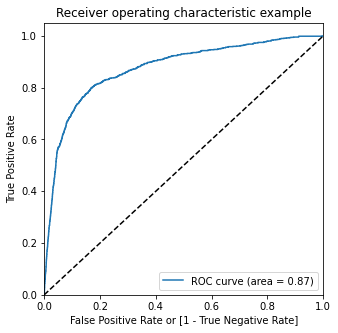

In [140]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### As we can see the area under the ROC curve is 0.87. So our model is doing pretty good job here

In [141]:
# Getting the confustion matrix

confusion_train = metrics.confusion_matrix(y_train, y_train_pred_final['predicted'] )
confusion_train

array([[11979,  3172],
       [  163,   756]], dtype=int64)

### Predicting on the test data

In [142]:
# Standardizing the test data using the tranform method

X_test = pd.DataFrame(scaler.transform(X_test),columns = X.columns)
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.017269  0.063212  0.140467     0.466042     1.013193     0.864708   
1 -0.142491  0.626800  1.401703     0.001261     0.280684     0.580598   
2  0.400526  0.067158  0.315756     0.058743    -0.030602     0.416178   
3  0.772485  0.711014  0.262736     0.131758     1.160740     0.566069   
4 -0.326062  0.329610 -0.118112     1.215627     2.193648     1.440269   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  total_og_mou_6  total_og_mou_7  \
0     -0.414738     -0.178821     -0.337716        0.065607        0.602687   
1     -0.082154      0.705602      2.916770       -0.015560        0.721956   
2      0.486809      0.314450      0.272612        0.438879        0.234955   
3     -0.372578     -0.629439     -0.353207       -0.108657        0.409918   
4     -0.614128     -0.469707     -0.227178        0.333834        1.212184   

   total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0       -0.223743        0.549170        0.664090       -0.466061   
1        2.446955       -0.425563       -0.461477       -0.255258   
2        0.502993       -0.411651       -0.404038       -0.548399   
3        0.196803        1.249976        0.566157        1.014752   
4        0.832672       -0.770055       -0.699241       -0.772600   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8       aon  \
0            0.885069            0.289494           -0.954459 -0.813337   
1           -1.075135           -0.715748            0.864934 -0.829998   
2           -0.438705           -1.042754            0.622348 -0.374959   
3           -1.075135           -0.921641           -0.833166 -0.968488   
4            0.325011           -1.042754            0.792158 -0.222932   

   total_rech_val_8  avg_rech_amt  roam_tot_mou_6  roam_tot_mou_7  \
0         -0.411568     -0.535538       -0.251489       -0.218228   
1          0.653196      2.153730       -0.251489       -0.218228   
2         -0.249724     -0.590872       -0.251489       -0.218228   
3         -0.324967     -0.239497       -0.251489       -0.218228   
4         -0.151765      0.457721        0.099321       -0.218228   

   roam_tot_mou_8  total_t2f_mou_6  total_t2f_mou_7  total_t2f_mou_8  \
0        2.754462        -0.464154        -0.330255        -0.595852   
1       -0.222727        -0.562963        -0.566941        -0.544510   
2       -0.222727        -0.531728        -0.508158        -0.595852   
3       -0.222727        -0.550649        -0.502249        -0.467147   
4       -0.222727        -0.417904        -0.316881        -0.259320   

   vol_data_mb_6  vol_data_mb_7  vol_data_mb_8  monthly_data_6  \
0       0.381688      -0.688343      -0.645963       -0.224201   
1       0.103052       0.349302      -0.233506        1.042643   
2      -0.661837      -0.688343      -0.645963       -0.646482   
3      -0.661837      -0.688343      -0.645963       -0.646482   
4      -0.661837      -0.688343      -0.645963       -0.224201   

   monthly_data_7  monthly_data_8  tot_t2c_mou_6  tot_t2c_mou_7  tot_t2c_mou_8  
0       -0.666390       -0.621278       3.887923       2.257215       2.168446  
1        3.240820        0.633195      -0.343226      -0.352341      -0.351945  
2       -0.666390       -0.621278      -0.343226      -0.352341      -0.351945  
3       -0.666390       -0.621278       0.536518       0.027063      -0.351945  
4        2.068657        0.215038      -0.343226      -0.352341      -0.351945

In [143]:
# Taking the columns that are used to build the final model

X_test = X_test[col]
X_test.head()

onnet_mou_7  offnet_mou_7  total_og_mou_8  total_ic_mou_7  total_ic_mou_8  \
0     1.013193     -0.178821       -0.223743        0.664090       -0.466061   
1     0.280684      0.705602        2.446955       -0.461477       -0.255258   
2    -0.030602      0.314450        0.502993       -0.404038       -0.548399   
3     1.160740     -0.629439        0.196803        0.566157        1.014752   
4     2.193648     -0.469707        0.832672       -0.699241       -0.772600   

   last_day_rch_amt_8  total_t2f_mou_8  vol_data_mb_8  monthly_data_8  
0           -0.954459        -0.595852      -0.645963       -0.621278  
1            0.864934        -0.544510      -0.233506        0.633195  
2            0.622348        -0.595852      -0.645963       -0.621278  
3           -0.833166        -0.467147      -0.645963       -0.621278  
4            0.792158        -0.259320      -0.645963        0.215038

In [144]:
# Predicting on the test data

test_pred_prob = logreg.predict_proba(X_test)
test_pred_prob_1 = []
for prediction in test_pred_prob:
    test_pred_prob_1.append(prediction[1])

In [145]:
# Combining the actual churn and the churn probabilities

y_test_pred_final = pd.DataFrame({'Churn':list(y_test), 'Churn_Prob':test_pred_prob_1})
y_test_pred_final.head()

Churn  Churn_Prob
0      0    0.858431
1      0    0.030149
2      0    0.412475
3      0    0.251717
4      0    0.402375

In [146]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.858431          1
1      0    0.030149          0
2      0    0.412475          0
3      0    0.251717          0
4      0    0.402375          0

### Evaluating the model on the test data

In [147]:
# Confusion matrix for the test data

confusion_test = metrics.confusion_matrix(y_test, y_test_pred_final['predicted'] )
confusion_test

array([[5024, 1445],
       [  96,  323]], dtype=int64)

In [148]:
# Sesnitivity of the test data

sensi = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
sensi

0.7708830548926014

#### The sensitivity of the test data is 0.77 and that for the train data is 0.82. So our model is doing pretty good job on the test data as well

In [149]:
speci = confusion_test[0,0]/(confusion_test[0,0]+confusion_test[0,1])
speci

0.7766269902612459

#### The sensitivity of the test data is 0.77 and that for the train data is 0.79. So our model is doing pretty good job on the here as well

In [150]:
draw_roc(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)

#### The area under the ROC curve for the test data is 0.85 and it is 0.87 on the train data. In this aspect also the model is doing well

In [151]:
def print_metrics():
    print("************ Logistic Regression Model Metrics *************")
    print("Train Confusion Matrix:")
    confusion_train = metrics.confusion_matrix(y_train, y_train_pred_final['predicted']) 
    print(confusion_train)
    print("Train sensitivity", confusion_train[1,1]/(confusion_train[1,0]+confusion_train[1,1]))
    print("Train specificity", confusion_train[0,0]/(confusion_train[0,0]+confusion_train[0,1]))
    print("*"*55)
    print("Test Confusion Matrix:")
    confusion_test = metrics.confusion_matrix(y_test, y_test_pred_final['predicted'])
    print(confusion_test)
    print("Test sensitivity", confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))
    print("Test specificity", confusion_test[0,0]/(confusion_test[0,0]+confusion_test[0,1]))
    print("*"*55)

In [152]:
print_metrics()

************ Logistic Regression Model Metrics *************
Train Confusion Matrix:
[[11979  3172]
 [  163   756]]
Train sensitivity 0.8226332970620239
Train specificity 0.7906408817899808
*******************************************************
Test Confusion Matrix:
[[5024 1445]
 [  96  323]]
Test sensitivity 0.7708830548926014
Test specificity 0.7766269902612459
*******************************************************


#### As we got the good values of the sensitivity, specificity and Area under ROC curve for the train data and these values are close enough for the test data as well, we can treat our model is pretty good. And we will proceed with visualsing the important factors

In [153]:
# Combining the varaibles used to build the final model and churn into one dataframe to visualize the data

tel = telecom[col]

tel['churn'] = list(y)
tel.head()

onnet_mou_7  offnet_mou_7  total_og_mou_8  total_ic_mou_7  total_ic_mou_8  \
0         0.00          0.00            0.00            0.00            5.44   
1       351.03         80.63          171.56           28.49           16.54   
2       132.11        896.68         1068.54          131.89          261.04   
3        50.66         89.36          239.48          222.89          298.33   
4       619.96         50.58          764.19           67.94           49.64   

   last_day_rch_amt_8  total_t2f_mou_8  vol_data_mb_8  monthly_data_8  churn  
0                 252             1.15         115.36               1      1  
1                  10             0.00          11.97               3      0  
2                  50            11.97           0.00               0      0  
3                   0             0.71        1009.93               2      0  
4                 130             0.00           0.00               0      0

# Feature importance

In [154]:
columns = list(X_train.columns)
coefficients = list(logreg.coef_.T)
coefficient_data = pd.DataFrame(coefficients,index=columns, columns=['coefficients'])
coefficient_data

coefficients
onnet_mou_7             0.489308
offnet_mou_7            0.401746
total_og_mou_8         -1.009027
total_ic_mou_7          0.476495
total_ic_mou_8         -1.478620
last_day_rch_amt_8     -0.458513
total_t2f_mou_8        -0.518842
vol_data_mb_8          -0.570260
monthly_data_8         -0.503246

In [155]:
coefficient_data.coefficients.abs().sort_values(ascending=False).index

Index(['total_ic_mou_8', 'total_og_mou_8', 'vol_data_mb_8', 'total_t2f_mou_8',
       'monthly_data_8', 'onnet_mou_7', 'total_ic_mou_7', 'last_day_rch_amt_8',
       'offnet_mou_7'],
      dtype='object')

#### From the above summary, it is clear that the total_ic_mou_8, total_og_mou_8, vol_data_mb_8, total_t2f_mou_8, and monthly_data_8 are the top 5 variables that are impacting the churn and all these varaibles has the negative coefficient value, which means the probabilitiy of the churn increases if these variables decreases. Let's see the same in the plots 

In [156]:
f, axes = plt.subplots(3, 2, figsize=(16,12))

sns.barplot(data = telecom, x = 'churn', y = 'total_ic_mou_8', estimator = np.mean, ax=axes[0,0])

sns.barplot(data = telecom, x = 'churn', y = 'total_og_mou_8', estimator = np.mean, ax=axes[0,1])

sns.barplot(data = telecom, x = 'churn', y = 'vol_data_mb_8', estimator = np.mean, ax=axes[1,0])

sns.barplot(data = telecom, x = 'churn', y = 'total_t2f_mou_8', estimator = np.mean, ax=axes[1,1])

sns.barplot(data = telecom, x = 'churn', y = 'monthly_data_8', estimator = np.mean, ax=axes[2,0])

<AxesSubplot:xlabel='churn', ylabel='monthly_data_8'>

#### From above plots, we can see that the average value of these five variables is less for the churn case compared to the non-churn case.

# Recommendataions

1. If the incoming calls or outgoing calls reduces in the action months, provide some talktime related offers to the customers inorder to retain them
2. If the data volume or calls to the fixed lines reduces in the action months, provide some data related offers or unlimited call offers to the specific fixed lines
3. If the user didn't do the data recharge in the action months, provide data related offers to retain them